# ***Enhancing Profit & Precision: High-Value Clients with CLV in Car Insurance***

## ***Business Understanding***


**Context**
**(English)**

In the insurance industry, the concept of [Customer Lifetime Value (CLV)](https://www.researchgate.net/publication/262944286_Customer_Lifetime_Value_A_Review#:~:text=The%20objective%20of%20this%20study,Chang%20et%20al) has become increasingly important in understanding and managing customer relationships. CLV is a strategic metric that assesses the total revenue a customer expects to generate from their relationship with a company. Assessing CLV is of course very important for effective customer segmentation, so that insurance companies can differentiate customer groups based on their value and potential profitability. The industry faces challenges in effectively managing diverse customer segments, such as high-income individuals who generally pay more and claim less, versus low-income customers who may claim more frequently. This segmentation is key to developing targeted strategies for customer engagement and resource allocation. As the insurance sector evolves, understanding and leveraging CLV becomes integral to increasing company profitability and sustaining long-term growth.


### Problem Statement:
(English)

- Our car insurance company is currently challenged with a generalized approach in allocating marketing and service resources, which does not differentiate between customers of varying potential values. This approach leads to an inefficient use of resources, as it does not adequately align with the differing CLV of individual customers. Consequently, there is a missed opportunity in effectively engaging and retaining customers who could contribute significantly to the company's profitability. The lack of a nuanced marketing strategy, underpinned by an accurate predictive model for Customer Lifetime Value (CLV), limits our strategic decision-making in customer engagement. There is a critical need for a predictive model that can stratify customers based on their potential CLV, thereby enabling more strategic and effective allocation of marketing and service efforts.

### Goal:
**(English)**

The main goal is to develop a predictive model that can calculate CLV for new and existing customers by predicting CLV.

- Reduce or minimize the presence of low-income customers with small premiums but high claim potential.
- thereby increasing opportunities for customers with high value potential.


### Analytic Approach:

This project aims to predict `CLV` (Customer Lifetime Value) in the context of car insurance with a methodical approach. The analysis approach is carried out by collecting comprehensive data, including policy and claims history, then cleaning and organizing the data for analysis. With this data, we use advanced techniques, including machine learning, to build models that predict future customer value. The results enable smarter business decisions, focus on growth, and increase efficiency or profitability in the auto insurance industry.


| **Evaluation Metrics**                   | **Intended Use**  | **Interpretation**                                                                                                           |
|---------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------|
| **Mean Absolute Error (MAE)**         | Measures the average absolute error between predicted and actual CLV values.                                                | Provides direct insight into how well the model can predict CLV values ​​without over-penalizing large errors, thereby emphasizing prediction consistency.|
| **R-squared (R²)**                    | Measures the extent to which features in the model can explain variations in CLV.                                               | Higher values ​​indicate the model can explain most of the variation in CLV without providing specific information about the direction of the relationship with the predictor variables          |
| **Mean Absolute Percentage Error (MAPE)** | Measures the average percentage difference between the predicted value and the actual CLV value.                              | Provides information about how big the model's error is relative to the actual value scale in percentage form, making comparisons between datasets easier.           |






### Limitation Project

1. Complexity of Customer Behavior
- Models may not fully reflect variation and complexity in customer behavior due to limitations in available data.
2. Technological Limitations
- Existing technologies may be insufficient for sophisticated data analysis and complex predictive modeling, limiting analytical capabilities and model accuracy.
3. Model Evaluation and Validation
- Current validation methods may not fully reflect the actual conditions of the auto insurance industry, affecting the accuracy and relevance of the model in real applications.

## ***Data Understanding***

### Load Library

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
from tabulate import tabulate

# Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Load Dataset

In [2]:
with open('../Data/Raw/data_customer_lifetime_value.csv','r') as file:
    data = pd.read_csv(file)

clv= data.copy(deep=True)
clv


df, unseen = train_test_split(clv, test_size=0.2, random_state=42)


### **Attributes Information**

| **Atribut**                | **Tipe Data** | **Deskripsi**                                            |
|----------------------------|---------------|----------------------------------------------------------|
| Vehicle Class              | Object        | Classification of vehicle types                          |
| Coverage                   | Object        | Types of vehicle insurance coverage                      |
| Renew Type Offer           | Object        | Offer to renew policies that have/will expire            |
| EmploymentStatus           | Object        | Customer employment status                               |
| Marital Status             | Object        | Customer marital status                                  |
| Education                  | Object        | Customer education level                                 |
| Number of Policies         | Float         | Number of policies owned by the customer                 |
| Monthly Premium Auto       | Float         | Monthly premium paid by the insured                      |
| Total Claim Amount         | Float         | Cumulative number of claims since policy inception       |
| Income                     | Float         | Customer revenue (in dollars)                            |
| Customer Lifetime Value    | Float         | Customer Lifetime Value (Target)                         |


### Skimming 

In [3]:
pd.DataFrame({
    'feature'           : df.columns.values,
    'data_type'         : df.dtypes.values,
    'null_value(%)'     : df.isna().mean().values * 100,
    'n_unique'          : df.nunique().values,
    'duplicate'         : df.duplicated().sum(),
    'Negative_value_num': [len(df[col][df[col] < 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    'Zero_value_num'    : [len(df[col][df[col] == 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    'Zero_value_obj'    : [len(df[col][df[col] == ''])/ len(df) * 100 if col in df.select_dtypes(include=np.object_).columns else 0 for col in df.columns],
    'sample_unique'     : [df[col].unique() for col in df.columns]}
).round(3)


,feature,data_type,null_value(%),n_unique,duplicate,Negative_value_num,Zero_value_num,Zero_value_obj,sample_unique
0,Vehicle Class,object,0.0,6,457,0.0,0.000,0.0,"[Four-Door Car, Two-Door Car, SUV, Sports Car,..."
1,Coverage,object,0.0,3,457,0.0,0.000,0.0,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0.0,4,457,0.0,0.000,0.0,"[Offer1, Offer2, Offer3, Offer4]"
3,EmploymentStatus,object,0.0,5,457,0.0,0.000,0.0,"[Unemployed, Employed, Medical Leave, Retired,..."
4,Marital Status,object,0.0,3,457,0.0,0.000,0.0,"[Single, Married, Divorced]"
5,Education,object,0.0,5,457,0.0,0.000,0.0,"[High School or Below, College, Bachelor, Doct..."
6,Number of Policies,float64,0.0,9,457,0.0,0.000,0.0,"[2.0, 8.0, 9.0, 1.0, 3.0, 7.0, 6.0, 5.0, 4.0]"
7,Monthly Premium Auto,float64,0.0,182,457,0.0,0.000,0.0,"[87.0, 68.0, 82.0, 78.0, 71.0, 138.0, 95.0, 69..."
8,Total Claim Amount,float64,0.0,2672,457,0.0,0.000,0.0,"[626.4, 326.4, 393.6, 482.48791, 130.303439, 9..."
9,Income,float64,0.0,2956,457,0.0,24.961,0.0,"[0.0, 31356.0, 72608.0, 65252.0, 40417.0, 6779..."


Description of skimming
| **Handling Feature**                | **Description**                                           |
|----------------------------|------------------------------------------------------------------------|
| Missing Values              |There are no missing values in the dataset (0% null values in all columns). This is ideal as it indicates complete data and eliminates the need for imputation strategies.                              |
| Data Types and Uniqueness   |The dataset contains both categorical (object) and numerical (float64) data types. There is a good variety of unique values across the categorical features, indicating a diverse dataset.                              |
| Duplicates              |There are 618 duplicate rows in the dataset. This might require further investigation to determine if these are true duplicates or valid repetitions.| 
| Negative Values              |There are no negative values in the numerical columns, which is appropriate for the data types and features like income and CLV.                              |
| Zero Values              |The column 'Income' has 25.207% of its values as zero. This could indicate customers with no reported income. Other numerical columns do not have significant zero values.                              |
| Sample Unique Values              |Each categorical feature has a distinct set of values, suggesting a well-structured categorical system.                              |


In [4]:
# Displays descriptive statistics from numerical and categorical variables
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000
mean,3.012348,93.084675,431.339754,37956.422492,8046.990479
std,2.415183,34.727681,290.558211,30386.671868,6980.505900
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,262.673768,10149.500000,3964.482112
50%,2.000000,82.000000,379.200000,34498.000000,5808.932598
75%,4.000000,109.000000,547.200000,62451.500000,9040.167828
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,4535,4535,4535,4535,4535,4535
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2279,2782,1830,2839,2633,1361


Descriptive Statistics Summary

**`Numerical Variables:`**
| **Feature**          |**Range**          | **Average**                                          |
|-------------------------------|-------------------|----------------------------------------------------------------------|
| Number of Policies            | 1 to 9 policies per customer.               | Approximately 3 policies per customer, indicating moderate policy holding among customers.|                                               
| Monthly Premium Auto          | 61 to 297 units.                            | Average monthly premium is around 93 units, with a standard deviation of 34.55, suggesting moderate variability in premium amounts.                               |
| Total Claim Amount            | 0.42 to 2759.79 units.                      | The average claim amount is approximately 431.41 units, with a significant standard deviation, indicating wide variability in claim amounts.                         |
| Income                        | 0 to 99,934 units.                          | The dataset has a significant proportion of customers with zero income (as previously noted), which could represent missing or unreported income data.                |
| Customer Lifetime Value (CLV) | 1,898 to 83,325 units.                      |The average CLV is about 8,029.87 units. The large standard deviation and range indicate a substantial spread in CLV among customers.


**`Categorical Variables`**:
|**Feature**        |**Most Common Category**   |**Unique Categories**|
|-------------------|---------------------------|---------------------|
| Vehicle Class     | Dour-door Car.            | 6 |
| Coverage          | Basic                     | 3 |
| Renew Offer Type  | Offer1.                   | 4 |
| Employment Status | Employed                  | 5 |
| Marital Status    | Married.                  | 3 |
| Education         | Bachelor.                 | 5 |


**`Summary Insights`**:
|**Feature**            |**Description**                                 |
|-----------------------|------------------------------------------------|
| Policy Diversity      | Customers hold a variety of policy numbers, suggesting different levels of engagement with insurance services.     |
| Premium Variability   | There's a wide range in monthly premiums, pointing to diverse insurance product offerings.                         |
| Claim Amounts         | The wide range in claim amounts could indicate differences in the types of claims filed or the value of assets insured.|
| Income Discrepancy    | The significant proportion of zero income could be a data entry issue or represent a specific customer segment.   |
| CLV Spread            | A substantial spread in CLV suggests a diverse customer base in terms of profitability.                                   |

**Categorical Variable Trends: The most common categories in each feature provide insights into the most prevalent customer segments and policy preferences.**

- The dataset shows considerable diversity in customer profiles, with a wide range of values in numerical features like income, premium amounts, and CLV.
- There is a notable disparity in the income data, with a significant portion of customers having zero income reported.
- The high variability in CLV and claim amounts indicates different levels of profitability and risk associated with different customer segments.
- The categorical data reveal common trends in vehicle types, coverage, and customer demographics, which can inform targeted marketing and service strategies.


(English)
- The dataset shows great diversity in customer profiles and policy details.
- There is huge potential for targeted marketing and customer service strategies, especially given the large differences in CLV and number of claims.
- The presence of high-value outliers in CLV and claim amounts indicates opportunities for focused attention on certain customer segments.
- Understanding and segmenting this diverse customer base using predictive modeling will be crucial for optimizing marketing efforts and improving service delivery.

(Indonesian)
- Dataset menunjukkan keragaman besar dalam profil pelanggan dan detail polis.
- Ada potensi besar untuk pemasaran dan strategi layanan pelanggan yang ditargetkan, terutama dengan adanya perbedaan besar dalam CLV dan jumlah klaim.
- Memahami dan mengelompokkan basis pelanggan yang beragam ini akan sangat penting untuk mengoptimalkan upaya pemasaran dan peningkatan layanan.






## **EDA (Exploratory Data Analysis)**

https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value#clv-formula

#### Numerical Features 

##### Distribution

In [5]:
from scipy import stats
from tabulate import tabulate

numeric = df.select_dtypes(include=['float64', 'int64']).columns

# Conducting the Anderson-Darling Test for Normality
results = []
for col in numeric:
    column_data = df[col]
    # anderson-Darling distribution
    ad_statistic, ad_critical_values, ad_significance_levels = stats.anderson(column_data, dist='norm')
    result = 'Not Normal' if ad_statistic > ad_critical_values[2] else 'Normal'
    results.append([col, ad_statistic, ad_critical_values[2], ad_significance_levels[2], result])

# Create a table of results
headers = ['Column', 'AD Statistic', 'Critical Value (5%)', 'Significance Level (5%)', 'result']
table = tabulate(results, headers=headers, tablefmt='pretty')
print(table)

+-------------------------+--------------------+---------------------+-------------------------+------------+
|         Column          |    AD Statistic    | Critical Value (5%) | Significance Level (5%) |   result   |
+-------------------------+--------------------+---------------------+-------------------------+------------+
|   Number of Policies    | 365.71593262311126 |        0.786        |           5.0           | Not Normal |
|  Monthly Premium Auto   | 236.0062414405793  |        0.786        |           5.0           | Not Normal |
|   Total Claim Amount    | 90.01278812581586  |        0.786        |           5.0           | Not Normal |
|         Income          | 94.56312149541463  |        0.786        |           5.0           | Not Normal |
| Customer Lifetime Value | 346.0405146693556  |        0.786        |           5.0           | Not Normal |
+-------------------------+--------------------+---------------------+-------------------------+------------+


In the Anderson distribution test, it has been proven that the data in the features have an abnormal distribution. Then, to find out the skewness of the data, it will be visualized in the form of a hitsplot and get an overview of the distribution of the data to understand the overall characteristics of each feature and the boxplot will effectively reveal outliers. as an important note for pre-processing data.

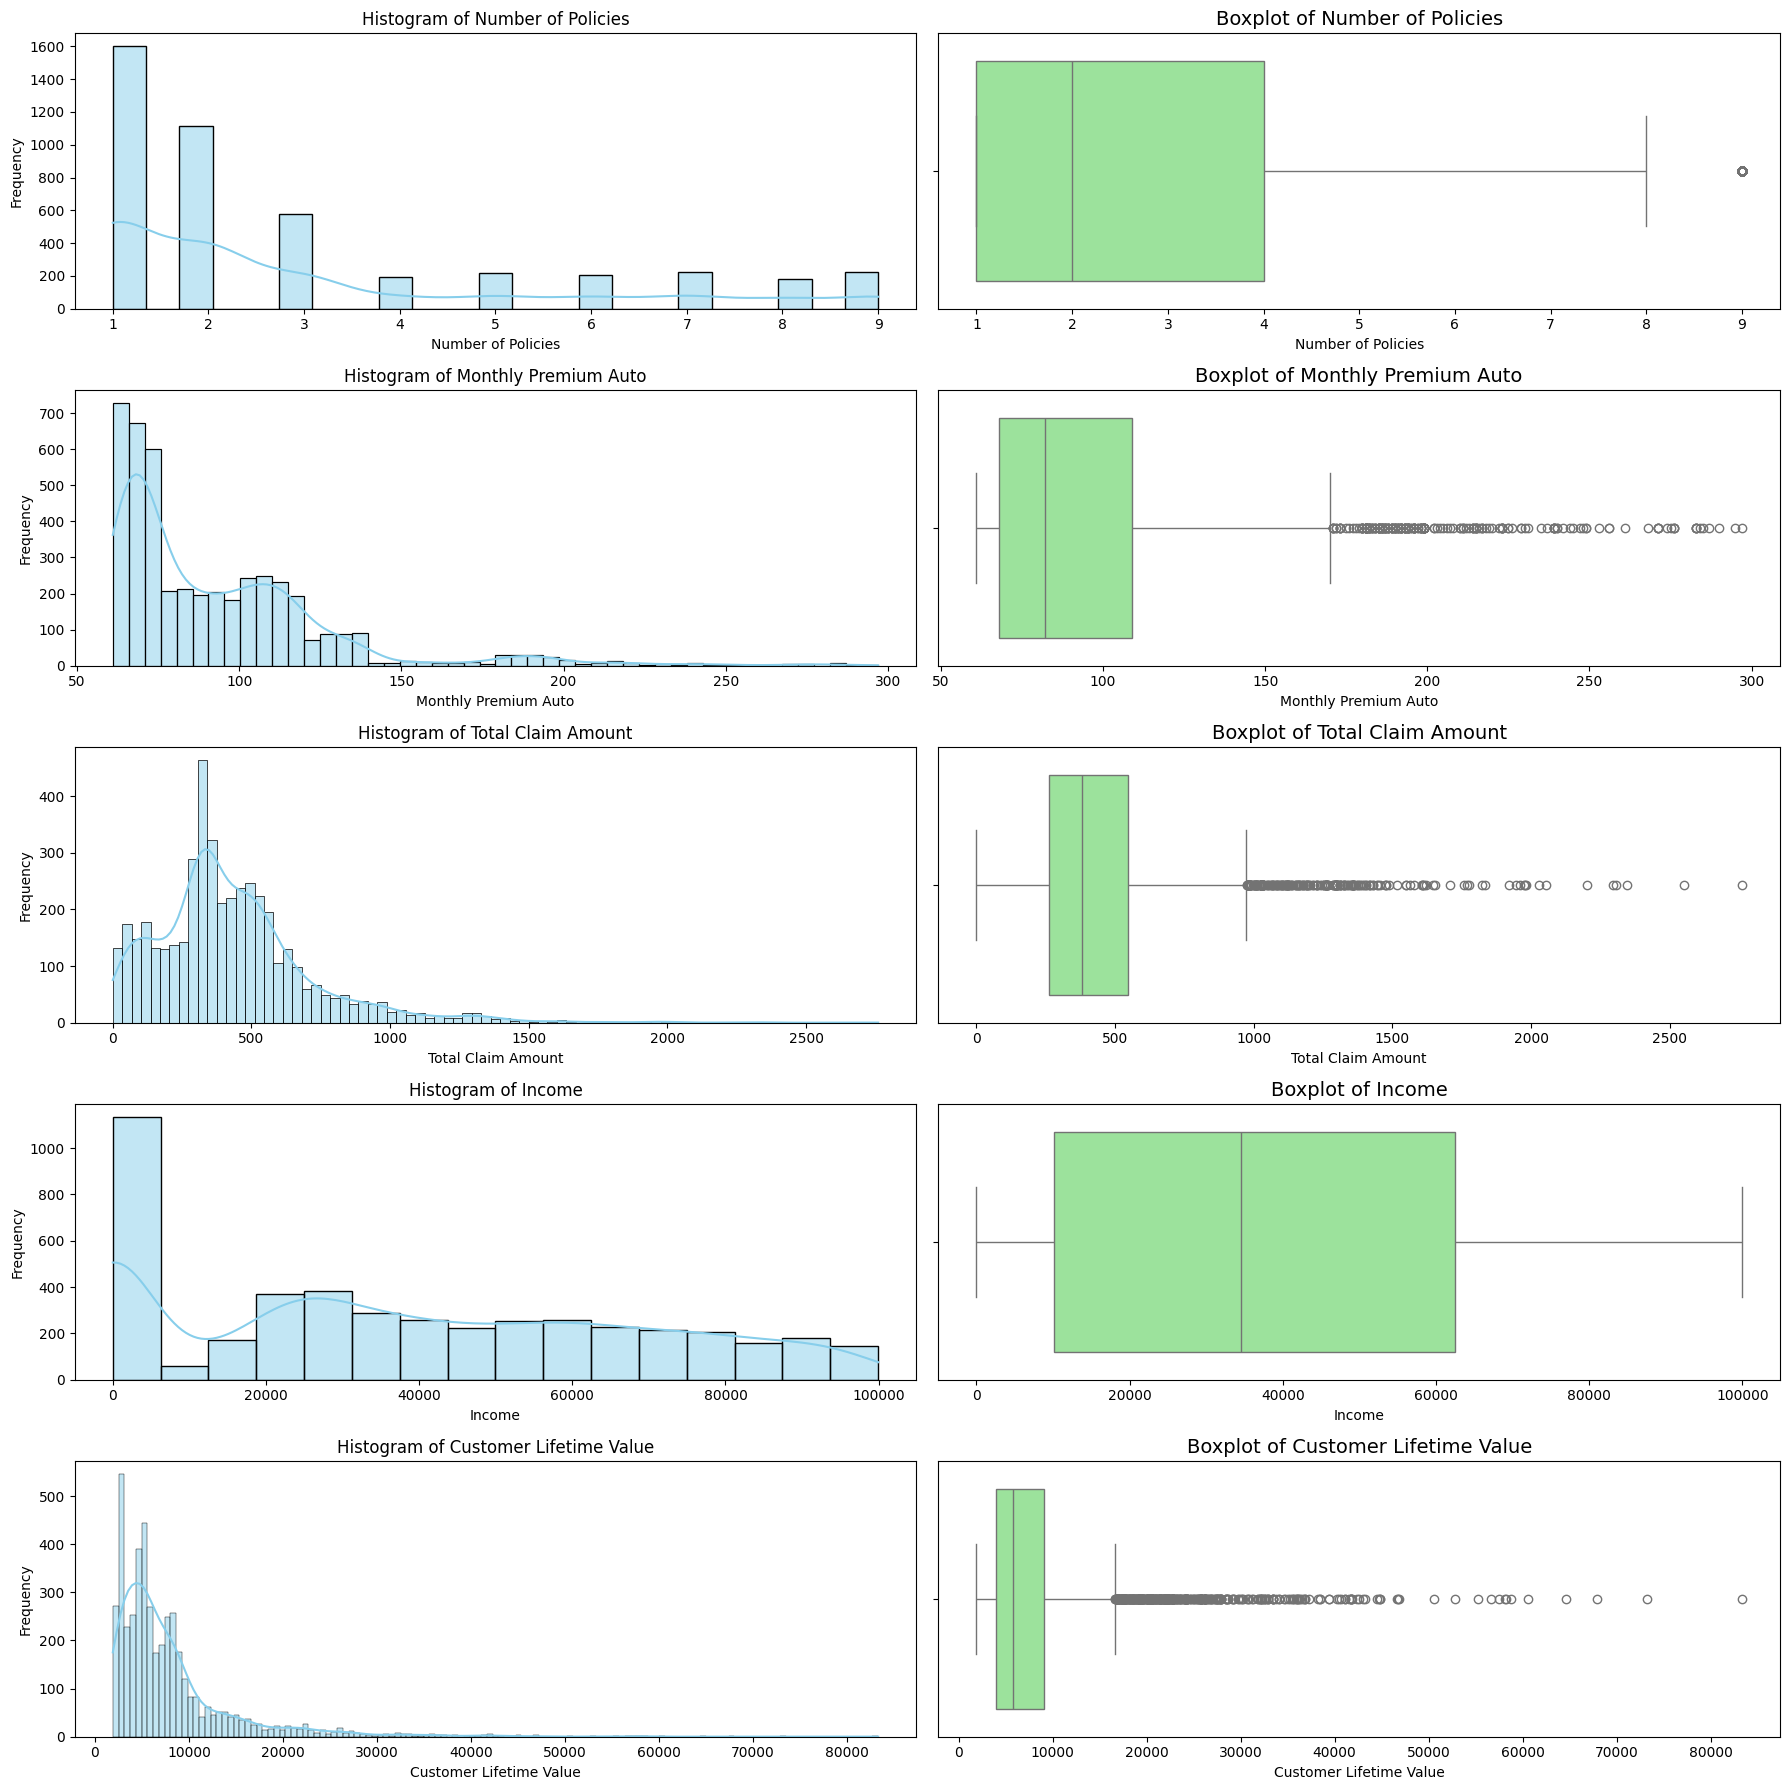

In [6]:
# Adjusting the code to create visualizations for all numerical features in the dataset
plt.figure(figsize=(18, 18))

# Looping through each numerical column to create subplots for histograms and boxplots
for index, col in enumerate(numeric):
    # Histogram
    plt.subplot(5, 2, index * 2 + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(5, 2, index * 2 + 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', size=14)
    plt.xlabel(col)

# Adjust layout to avoid overlap
plt.tight_layout()

plt.show()


| Feature             | Insight Summary |
|---------------------|-----------------|
| Number of Policies  | There is significant variation in customer policy amounts. The majority have lower policy amounts, but there are outliers who have very high amounts. |
| Monthly Premium Auto| Most customers pay low monthly premiums, but there are outliers with very high premiums, indicating variations in insurance costs. |
| Total Claim Amount  | Klaim sebagian besar berada pada rentang rendah, tetapi terdapat outlier untuk klaim yang sangat tinggi, menunjukkan risiko potensial bagi perusahaan. |
| Income              | Claims are mostly in the low range, but there are outliers for very high claims, indicating potential risks for the company. |
| CLV                 | CLV tends to be low for the majority of customers with a small number having very high values, indicating the potential for significant contributions from a small number of customers. |


##### Correlation Data

C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_19128\1519006481.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_correlation_matrix = df.corr(method='spearman')


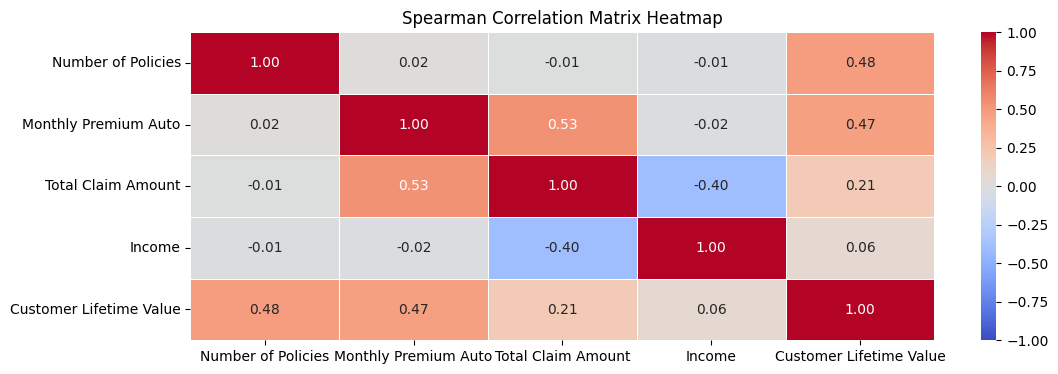

In [7]:
# Calculating the Spearman correlation matrix
spearman_correlation_matrix = df.corr(method='spearman')

# Creating a heatmap to visualize the Spearman correlation
plt.figure(figsize=(12, 4))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()


| Feature Comparison | Insights from Spearman Correlation |
|---------------------------|-----------------------------------|
| CLV vs Other Features | CLV shows varying correlations with other features, indicating different influences of each feature on the CLV value. |
| Inter-Feature Correlation | There are significant correlations between several features, providing insight into dynamic relationships in the data. |
| Strength and Direction | The color intensity in the heatmap indicates the strength and direction of the correlation; warmer colors for a strong positive correlation, and cooler colors for a negative correlation. |
| Highly Correlated Features| Highly correlated features can have a greater influence on CLV, important for further analysis in predictive modeling. |


##### Bivariate correlation

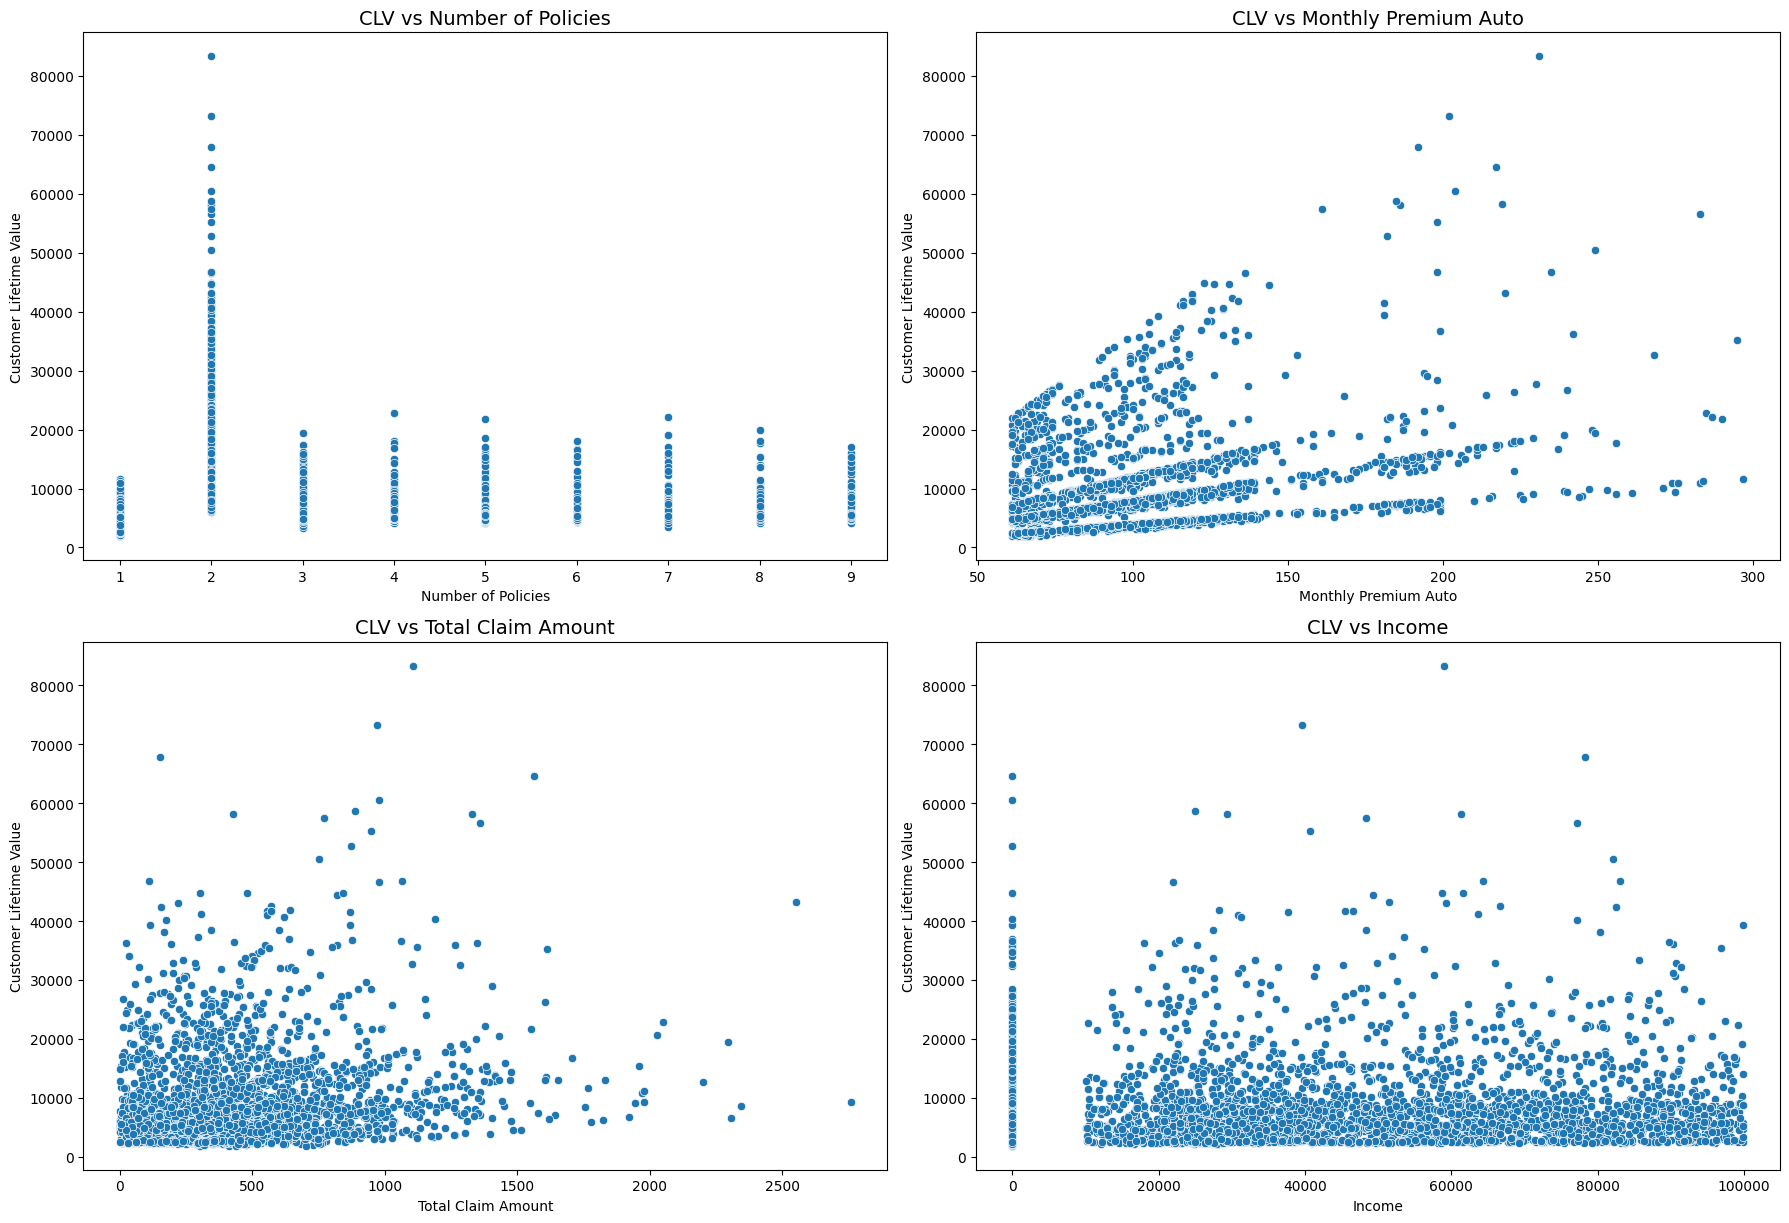

| Feature              |   Spearman Correlation with CLV |
|----------------------|---------------------------------|
| Number of Policies   |                       0.482523  |
| Monthly Premium Auto |                       0.465352  |
| Total Claim Amount   |                       0.208938  |
| Income               |                       0.0644042 |


In [8]:
# Creating scatter plots and calculating Spearman correlation coefficients
plt.figure(figsize=(18, 18))
correlation_with_clv = []
num_subplot = 1

for col in numeric:
    if col != 'Customer Lifetime Value':
        plt.subplot(3, 2, num_subplot)
        sns.scatterplot(x=df[col], y=df['Customer Lifetime Value'])
        plt.title(f'CLV vs {col}', size=14)
        plt.xlabel(col)
        plt.ylabel('Customer Lifetime Value')

        # Calculating Spearman correlation coefficient
        correlation_coefficient = df[col].corr(df['Customer Lifetime Value'], method='spearman')
        correlation_with_clv.append([col, correlation_coefficient])
        num_subplot += 1

plt.tight_layout()
plt.show()

# Prepare the correlation data for markdown table
correlation_table = [["Feature", "Spearman Correlation with CLV"]] + correlation_with_clv
correlation_table_md = tabulate(correlation_table, headers='firstrow', tablefmt='github')
print(correlation_table_md)


| Koefisien Korelasi | Tafsiran                    | Deskripsi                  |
|--------------------|-----------------------------|------------------------------------------|
| 0.0 – 0.2          | Very Low Correlation         | Income dengan CLV (0.0527)               |
| 0.2 – 0.4          | Low Correlation               | Total Claim Amount vs CLV (0.2052)   |
| 0.4 – 0.6          | Moderate Corerelation            | Number of Policies vs CLV (0.4915), Monthly Premium Auto vs CLV (0.4596) |
| 0.6 – 0.8          | Strong Correlation                | -                                        |
| 0.8 – 1.0          | Very Strong Correlation         | -                                        |


| Features | Insights from Correlation with CLV |
|--------------------|------------------------------------------------------------------|
| Number of Policies | A significant positive correlation (0.4915), shows a strong relationship between the number of policies and the CLV value. |
| Monthly Premium Auto | The positive correlation is quite strong (0.4596), indicating a relationship between a higher monthly premium and a higher CLV value. |
| Total Claim Amount | It has a lower correlation (0.2052) with CLV, but still shows a positive relationship. |
| Income | The correlation is relatively low (0.0527) with CLV, indicating that income may not be the main factor in determining CLV value. |

#### Categorical Features 

##### Distribution

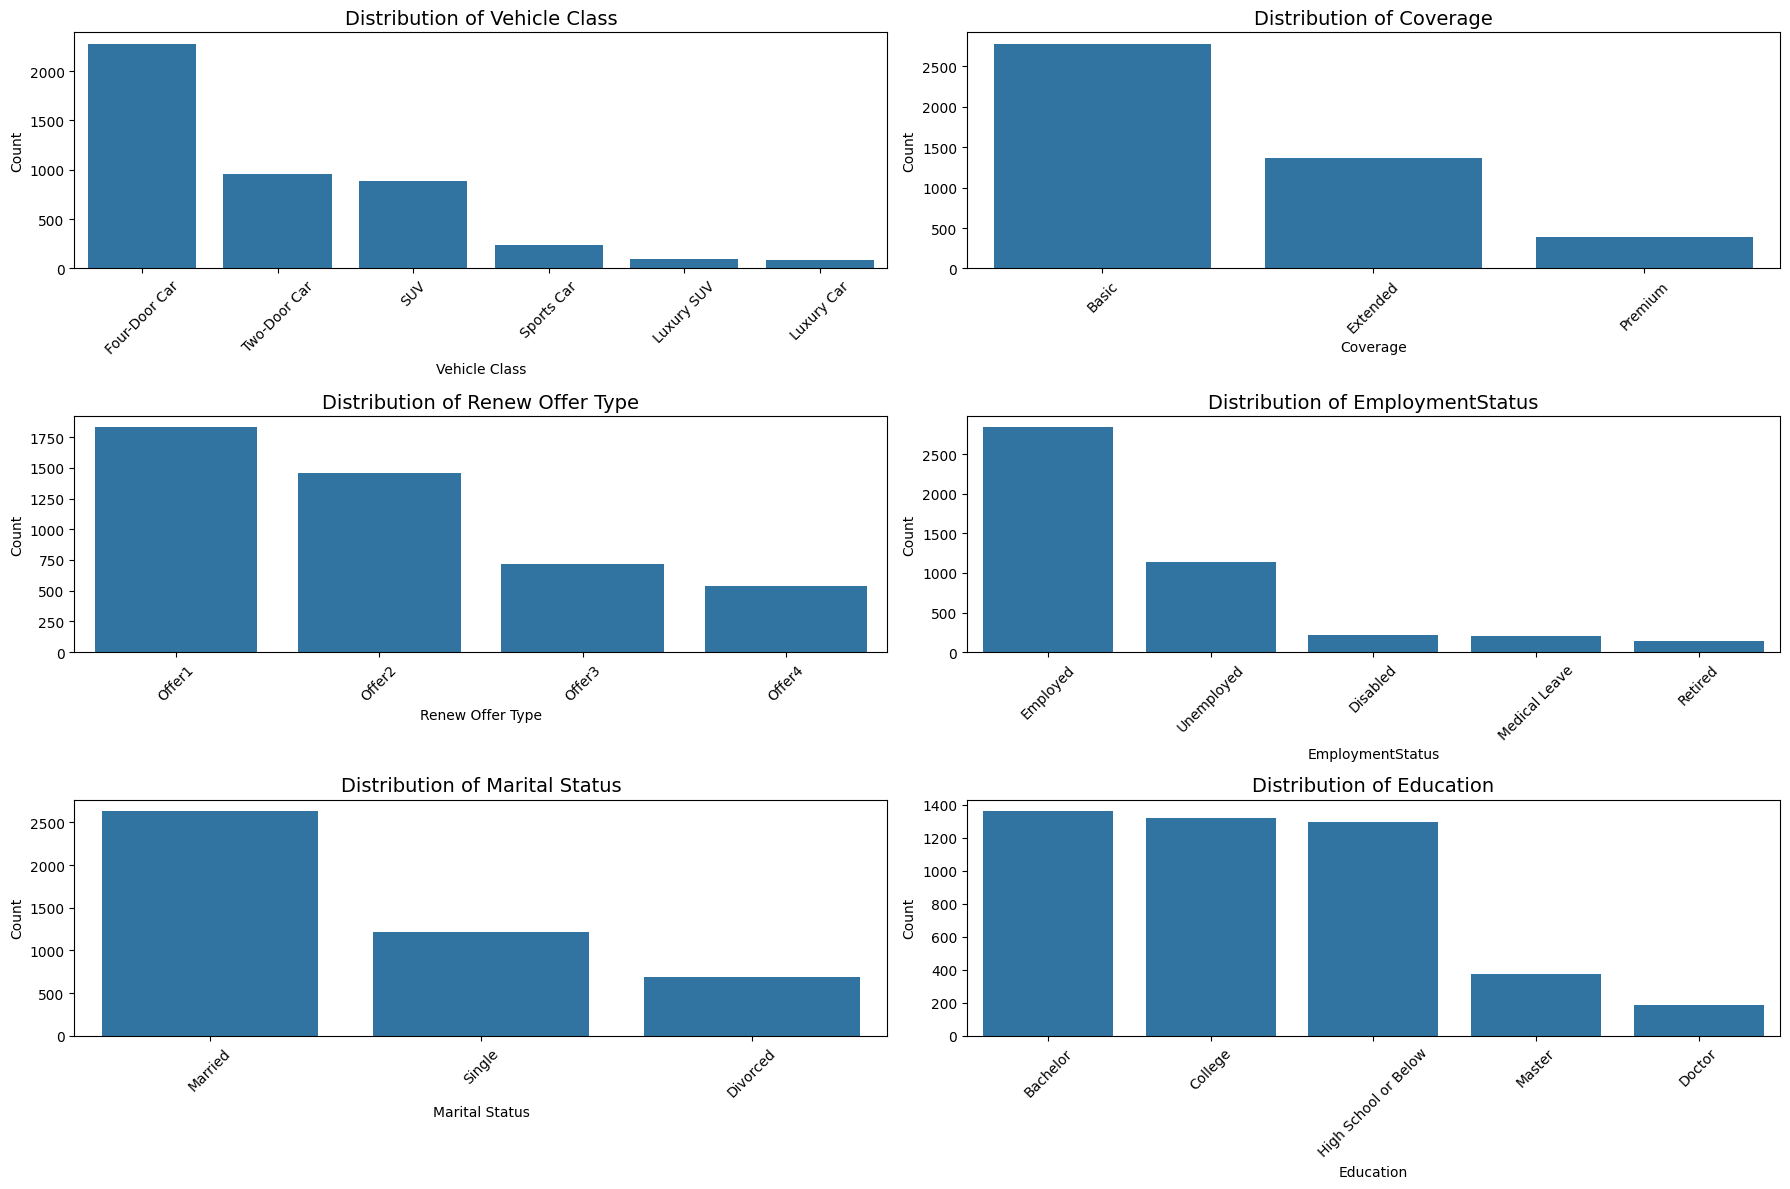

In [9]:
# Conducting EDA Point 1 (Distribution Analysis) for Categorical Features
plt.figure(figsize=(18, 12))
num_subplot = 1
category_insights = []
categorical = df.select_dtypes(include='object').columns
for col in categorical:
    plt.subplot(3, 2, num_subplot)
    category_count = df[col].value_counts()
    sns.barplot(x=category_count.index, y=category_count.values)
    plt.title(f'Distribution of {col}', size=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Adding insights for each category
    category_insights.append([col, 'Most common category: ' + category_count.idxmax() + ', Count: ' + str(category_count.max())])
    num_subplot += 1

plt.tight_layout()
plt.show()

| Features | Insights |
|------------------|----------------------------------------------|
| Vehicle Class | The most common vehicle class is 'Four-Door Car', which may indicate a common preference or need among customers. |
| Coverage | Most customers chose 'Basic' coverage, indicating that most customers are probably looking for an economical insurance option. |
| Renew Offer Type | 'Offer1' is the most frequently received offer type, which can inform future promotional strategies. |
| EmploymentStatus | The majority of customers are listed as 'Employed', indicating a group of customers who have stable incomes may be the main target. |
| Marital Status | The 'Married' status dominates, indicating that married customers may be a significant market segment. |
| Education | The title 'Bachelor' is most common among customers, which may reflect the educational demographics of customers. |

##### Correlation Data

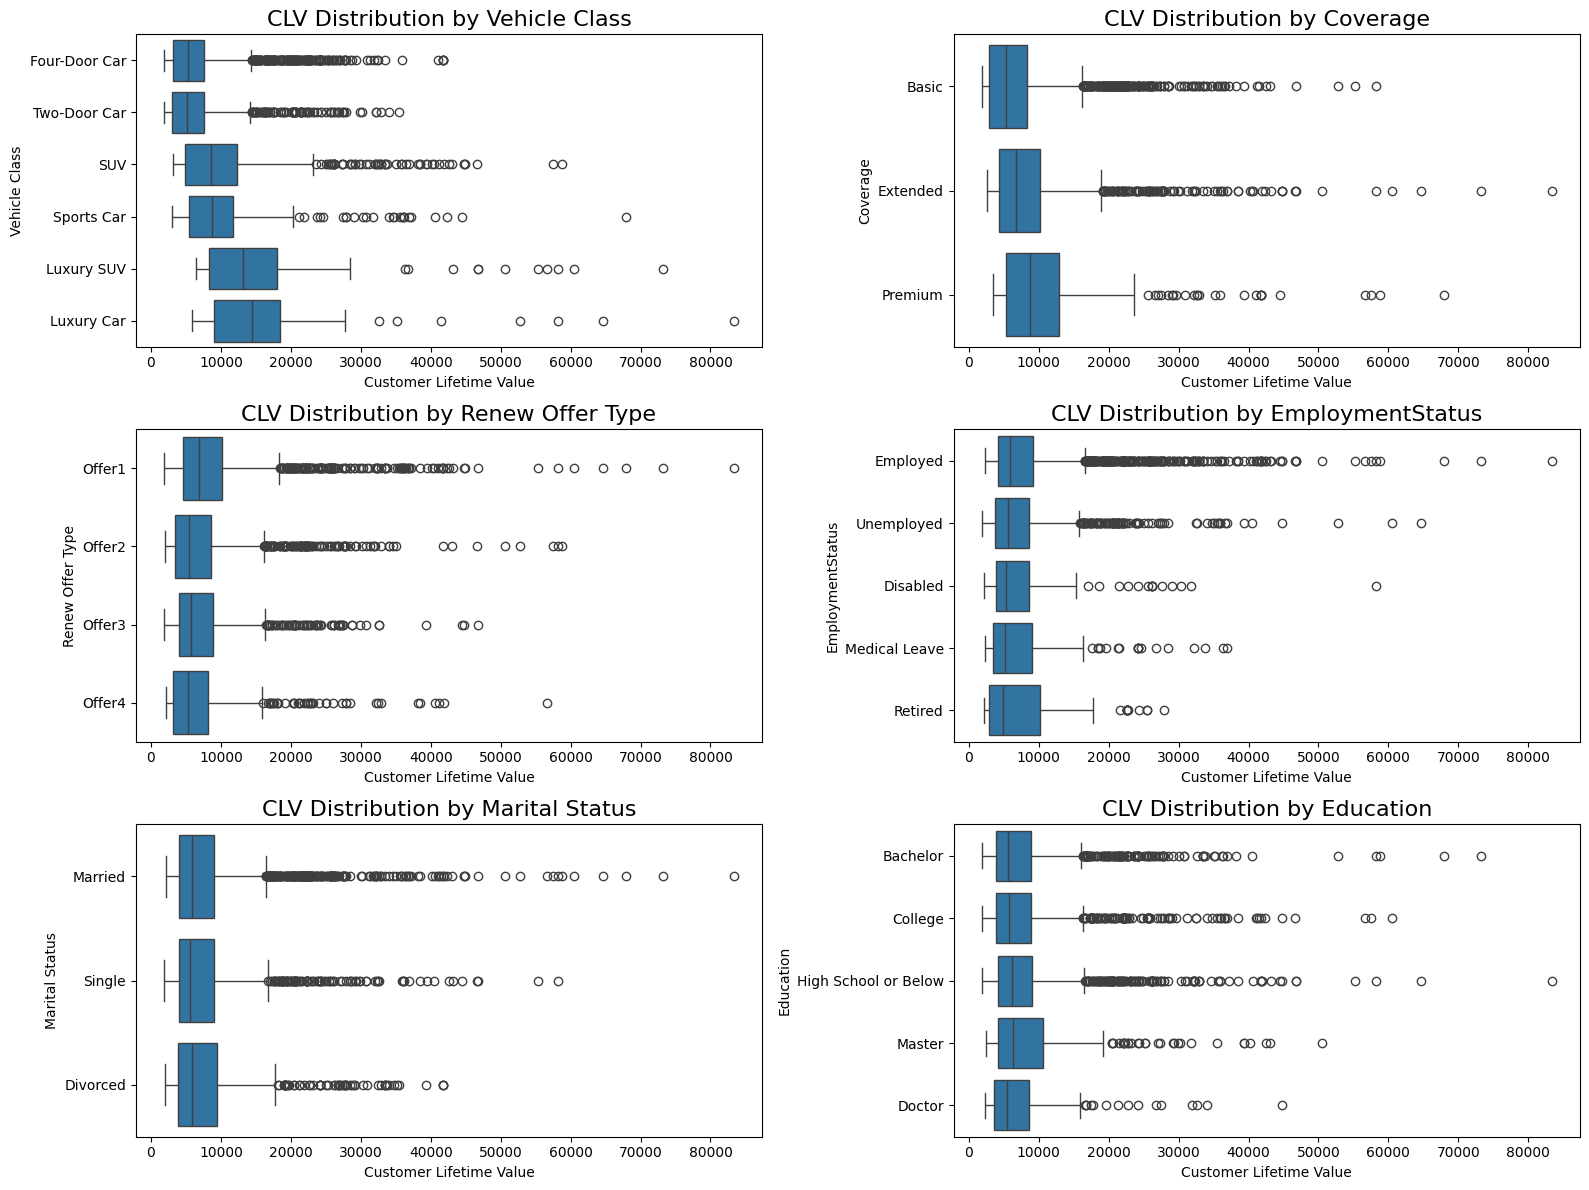

In [10]:
# Conducting EDA Point 2 for Categorical Features with respect to CLV
plt.figure(figsize=(16, 12))
num_subplot = 1
category_clv_insights = []

for col in categorical:
    plt.subplot(3, 2, num_subplot)
    sns.boxplot(data=df, y=col, x='Customer Lifetime Value', order=df[col].value_counts().index, )
    plt.title(f'CLV Distribution by {col}', size=16)
    plt.xlabel('Customer Lifetime Value')
    plt.ylabel(col)
    plt.tight_layout()
    num_subplot += 1

plt.show()


| Features | Insights Based on CLV Distribution |
|------------------|-----------------------------------------------------------------|
| Vehicle Class | Luxury vehicles (SUVs and Cars) have a higher CLV spread, indicating a potentially more profitable but perhaps riskier customer segment. |
| Insurance Coverage | Customers with 'Premium' coverage have a higher CLV, indicating that they could have important and valuable potential in the long term. |
| Employment Status | Employed customers show a higher median CLV, perhaps reflecting greater financial stability and higher insurance purchasing power. |
| Offer Type | Offer1 and Offer2 have a higher CLV distribution, indicating that customers have an interest in continuing insurance up to offer 2, but rarely continue to offer 3 and 4, other factors such as age, how long the duration insurance, etc. are needed to carry out a more in-depth analysis |
 | Marital Status | Married customers have a higher CLV, which may indicate a segment with more financial responsibilities and a need for more comprehensive insurance coverage. |
 | Education | Customers with a Bachelor's or Master's degree tend to have a higher CLV, perhaps due to a correlation with income level and the ability to purchase more complete coverage. |

After observing how various categorical features such as vehicle type and insurance coverage affect Customer Lifetime Value (CLV) via boxplots, we will now turn our focus to numerical features. In the next analysis, we will use scatterplots to explore the relationship between numerical variables such as number of policies, monthly premiums, number of claims, and income with CLV. Additionally, we will differentiate the data based on the Coverage type to see how this aspect affects the relationship between numerical features and CLV. This approach will help us understand more deeply the factors that influence customer value in various dimensions.

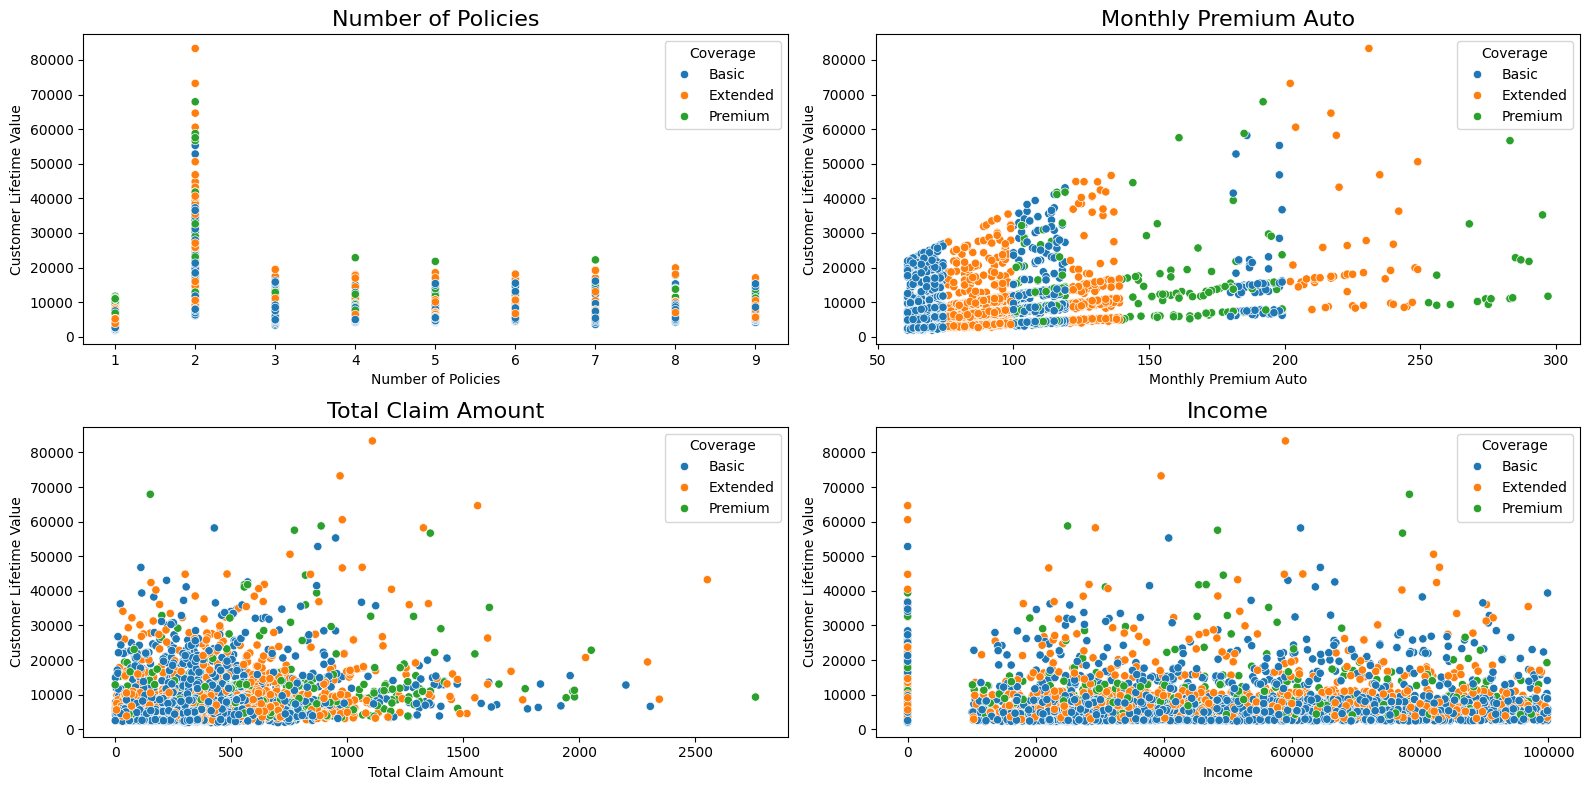

In [11]:
plt.figure(figsize=(16,8))
num_subplot = 1

for i in numeric:
    plt.subplot(2,2,num_subplot)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value', hue='Coverage', hue_order=['Basic', 'Extended', 'Premium'])
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1
    if num_subplot > 4:
        break  # If num_subplot > 4 , stop the loop


| Features | Insights |
|---------------------|---------------------------------------------------------------------------------------------------------------------|
| Number of Policies | Customers with 2 policies often have higher CLV values, marking them as 'high-value' customers. Customers with other policy amounts tend to have lower CLV values. |
| Monthly Premium Auto| There is a pattern where the CLV increases as the monthly premium increases. This shows that customers with higher monthly premiums tend to be 'high-value' customers. |
| Total Claim Amount | Claims under $1,000 are more frequently made by customers with low CLV. For claims above $1,000, there is no specific pattern that shows a direct relationship with CLV. |
| Income | There are customers without revenue who have varying CLVs, including very high values. However, most of the Income data showed no change significant pattern associated with CLV.|

##### Bivariate correlation

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

# Prepare a summary table for Chi-Square test results and Cramér's V
summary_table = []

for col in categorical:
    # Creating a contingency table
    contingency_table = pd.crosstab(df[col], df['Customer Lifetime Value'] > df['Customer Lifetime Value'].median())
    
    # Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Calculating Cramér's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1  # Correction for dof
    cramers_v = np.sqrt(chi2 / (n * min_dim))

    # Adding results to the summary table
    summary_table.append([col, chi2, p, cramers_v])

# Converting summary to a DataFrame
summary_df = pd.DataFrame(summary_table, columns=["Feature", "Chi-Square", "P-Value", "Cramér's V"])

# Filtering for significant results
significant_results = summary_df[summary_df['P-Value'] < 0.05]

# Displaying the significant results
significant_results



,Feature,Chi-Square,P-Value,Cramér's V
0,Vehicle Class,468.476106,5.073809e-99,0.321407
1,Coverage,314.116427,6.172834e-69,0.263182
2,Renew Offer Type,65.063026,4.862706e-14,0.119778
3,EmploymentStatus,11.231013,2.408683e-02,0.049765
5,Education,10.593273,3.153615e-02,0.048331


| Statistical Test | Boundary Value | Correlation Interpretation | Interpretation Example |
|----------------|------------------------|----------------------------|-----------------------------|
| Chi-Square | P-Value &lt; 0.05 | Significant relationship | The relationship between categorical variables and CLV is significant if the P-Value is less than 0.05. |
| Chi-Square | P-Value ≥ 0.05 | There is no significant relationship | There is insufficient evidence to suggest a significant relationship between categorical variables and CLV. |
| Cramer's V | 0.00 - 0.10 | Very weak or absent | Income with CLV (0.0527) |
| Cramer's V | 0.10 - 0.20 | Weak | Total Claim Amount with CLV (0.2052) |
| Cramer's V | 0.20 - 0.40 | Moderate | Coverage with CLV (0.2515) |
| Cramer's V | 0.40 - 0.60 | Strong | Number of Policies with CLV (0.4915) |
| Cramer's V | 0.60 - 0.80 | Very strong | - |
| Cramer's V | 0.80 - 1.00 | Very strong | - |

| Features | Interpretation of Relationship with CLV |
|------------------|---------------------------------------------------------------|
| Vehicle Class | The significant impact of 'Vehicle Class' on CLV indicates that vehicle type plays a role in determining long-term customer value. Luxury vehicles such as SUVs or Sports Cars tend to be associated with higher CLV. |
| Coverage | The strong relationship between 'Coverage' and CLV indicates that the type of coverage a customer chooses has the potential to influence their value to the company. Broader coverage is often associated with higher CLV. |
| Renew Offer Type | Variations in CLV based on 'Renew Offer Type' indicate that the offer given has an influence on customer value tendencies. Effective offers can increase customer retention and value. |
| Education | Although the relationship between 'Education' and CLV is not as strong as other features, there are indications that the level of education has a role in the CLV value. This can be a consideration in communicating and offering insurance products. |

## **Pre-Processing Data**

In order to ensure the continued smooth running of the project, the data preparation stage is of crucial importance in mitigating risks and ensuring the continuity of data analysis. The fundamental concept that must be adhered to is that optimal data integrity and quality is the foundation of an accurate and reliable Machine Learning model.

The following are a series of steps to be taken to optimally prepare data in the context of a car insurance project:
1. Duplicate Data Cleaning (Duplicate Data Removal)
- The initial stage involves identification and elimination of data that may be duplicate. The existence of duplicate data can be detrimental to the analysis and introduce undesirable distortions in modeling. Therefore, detection and elimination of duplicate data becomes an essential step.

2. Handling Unusual Values ​​(Outlier Handling)
- Deep understanding of the variability of values ​​in a dataset helps us identify and deal with values extremes that can affect model accuracy. By eliminating outlier values, we can ensure a more consistent data distribution.

 3. Categorical Variable Encoding
 - To facilitate processing by machine learning models, it is necessary to transform categorical variables into numerical form. Encoding processes, such as one-hot encoding or label encoding, will be implemented according to the needs and nature of the data.

 The original dataset will be duplicated for these steps, to ensure independence from the main dataset and maintain a level of professionalism in model development.

In [13]:
# deep copy data to ensure the data will not affect the original data
data =  df.copy(deep=True)

### Findings, Identification, Quantification
Skimming data at the data understanding stage found duplicate data and outliers at the EDA stage which were found in the numerical features.

#### Duplicate data
- This duplication of data will affect modeling because it can cause bias in the model training stage, therefore it is necessary to eliminate duplication.


In [14]:
# Returns a dataframe containing duplicate data
data[data.duplicated()].sort_values('Customer Lifetime Value').head()
print(f'duplicated data: {data.duplicated().sum()}')
print(f'amount of data', len(data))
# Drop data duplicates
data = data.drop_duplicates(keep='first')

# drop duplicates confirmation
print(f'duplicated data: {data.duplicated().sum()}')
print(f'amount of data', len(data))

duplicated data: 457
amount of data 4535
duplicated data: 0
amount of data 4078


#### Outlier
- Checking how big the outlier percentage is in the data to determine the handling method to get good performance for the model

Outlier Information :
Number of Policies: 221 outlier (4.87% of the total data)
Monthly Premium Auto: 224 outlier (4.94% of the total data)
Total Claim Amount: 225 outlier (4.96% of the total data)
Income: 0 outlier (0.00% of the total data)
Customer Lifetime Value: 396 outlier (8.73% of the total data)


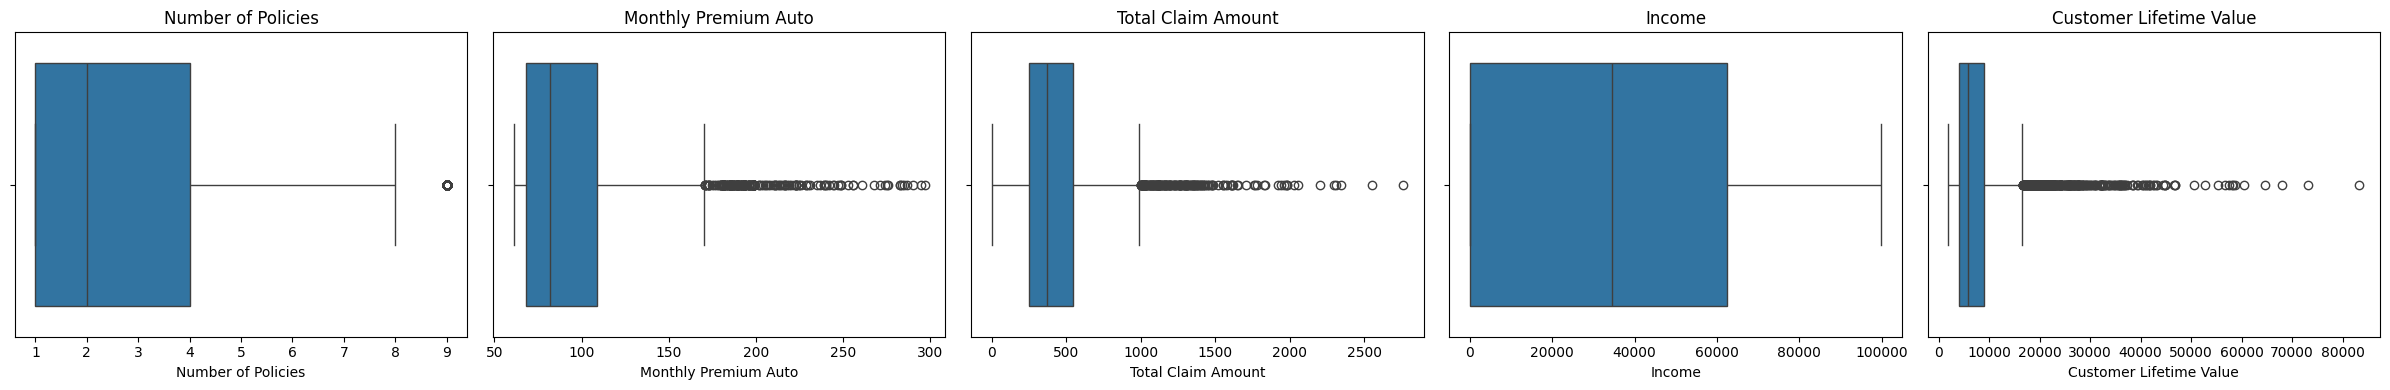

In [15]:
# Displays a boxplot to see outliers
plt.figure(figsize=(24,4))
num_subplot = 1

for i in df.describe().columns:
    plt.subplot(1,5,num_subplot)
    sns.boxplot(data=data, x=i),
    plt.title(i),
    plt.tight_layout()
    num_subplot+=1


outlier_info = {}  # Dictionary to store outlier information for each feature

for i in data.describe().columns:
    # Calculate the upper and lower limits to determine outliers
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outlier_count = len(df[(df[i] < lower_bound) | (df[i] > upper_bound)])
    
    # Calculate the percentage of outliers
    outlier_percentage = (outlier_count / len(df)) * 100
    
    # Storing outlier information in a dictionary
    outlier_info[i] = {'count': outlier_count, 'percentage': outlier_percentage}

# Displays outlier information 
print("Outlier Information :")
for feature, info in outlier_info.items():
    print(f"{feature}: {info['count']} outlier ({info['percentage']:.2f}% of the total data)")



The outlier percentage allows us to perform 3 experimental actions for the model with the conditions:

1. Even though the `Customer Lifetime Value` (target) feature has outliers above 5%, in the first experimental condition the outliers are not followed up because the percentage of outliers in the `Number of Policies`, `Monthly Premium Auto`, `Total Claim Amount` features is less from 5 %
2. Outliers are followed up by dropping outliers on all numerical features
3. imputation of outliers with the median and taking domain knowledge from

##### Handling outlier 

In [16]:
def calculate_iqr_bounds(column_data):
    """
    Calculate the Interquartile Range (IQR) and its bounds for outlier detection.

    Args:
    column_data (pd.Series): A Pandas Series containing the data of a single column.

    Returns:
    dict: A dictionary containing the IQR, lower bound, and upper bound.
    """
    quartile_1 = column_data.quantile(0.25)
    quartile_3 = column_data.quantile(0.75)
    iqr_value = quartile_3 - quartile_1
    bound_multiplier = 1.5

    bounds = {
        "IQR": iqr_value,
        "Lower Bound": quartile_1 - bound_multiplier * iqr_value,
        "Upper Bound": quartile_3 + bound_multiplier * iqr_value
    }

    return bounds


##### Handling outliers - Number of Policies

In [17]:
data3 = data.copy(deep=True)
calculate_iqr_bounds(data3['Number of Policies'])

{'IQR': 3.0, 'Lower Bound': -3.5, 'Upper Bound': 8.5}

In [18]:
# Displaying statistical summary for 'Number of Policies'
stat_des1 = data3['Number of Policies'].describe()
print(stat_des1)


count    4078.000000
mean        3.021089
std         2.407279
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Number of Policies, dtype: float64


In [19]:
unique_values = data3['Number of Policies'].unique()
count_above_upper_bound = (data3['Number of Policies'] > 8.5).sum()

print(f"Unique values in 'Number of Policies': {unique_values}")
print(f"Count of 'Number of Policies' above upper bound: {count_above_upper_bound}")


Unique values in 'Number of Policies': [2. 8. 9. 1. 3. 7. 6. 5. 4.]
Count of 'Number of Policies' above upper bound: 197


Analysis of the `Number of Policies` column reveals that the maximum value considered normal is 8.5. However, there were 197 customers with a total of 9 policies, which according to IQR criteria were considered outliers. Despite this, the decision was taken not to release this data. The reason is because this data has the potential to have an important role in predicting Customer Lifetime Value (CLV), especially because there are indications of a significant positive correlation between `Number of Policies` and CLV. This means that retaining such data can provide deeper insight into the influence of the number of policies on CLV``

##### Handling outliers - Monthly Premium Auto

In [20]:
calculate_iqr_bounds(data3['Monthly Premium Auto'])

{'IQR': 41.0, 'Lower Bound': 6.5, 'Upper Bound': 170.5}

In [21]:
# Displaying statistical summary for 'Monthly Premium Auto'
stat_des2 = data3['Monthly Premium Auto'].describe()
print(stat_des2)


count    4078.000000
mean       92.772437
std        34.259878
min        61.000000
25%        68.000000
50%        82.000000
75%       109.000000
max       297.000000
Name: Monthly Premium Auto, dtype: float64


In [22]:
unique_values = data3['Monthly Premium Auto'].unique()
count_above_upper_bound = (data3['Monthly Premium Auto'] > 170.5).sum()

print(f"Count of 'Monthly Premium Auto' above upper bound: {count_above_upper_bound}")


Count of 'Monthly Premium Auto' above upper bound: 203


In an analysis of the `Monthly Premium Auto` feature on our dataset, it was identified that the upper limit was $170.5, affecting 203 customers. When considering dropping values ​​outside this limit, there is the potential for significant data loss. However, by including the understanding from the 2023 Forbes article as additional domain knowledge as a reference which mentions the largest [premium costs](https://drive.google.com/file/d/1HZlA9GXY4Cj8w0wwXW-0cWbqBdbWJgP3/view?usp=sharing) full coverage cars New York is around $4,769 per year (or about $397.41 per month). This approach may be more appropriate for upper bounds for outliers, although it may still limit the model's accuracy in predicting higher `Monthly Premium Auto` values.

##### Handling outliers - Total Claim Amount

In [23]:
calculate_iqr_bounds(data3['Total Claim Amount'])

{'IQR': 296.51425825,
 'Lower Bound': -194.970714125,
 'Upper Bound': 991.0863188750001}

In [24]:
# Displaying statistical summary for 'Monthly Premium Auto'
stat_des3 = data3['Total Claim Amount'].describe()
print(stat_des3)


count    4078.000000
mean      428.570067
std       294.865153
min         0.423310
25%       249.800673
50%       373.327615
75%       546.314932
max      2759.794354
Name: Total Claim Amount, dtype: float64


In [25]:
unique_values = data3['Total Claim Amount'].unique()
count_above_upper_bound = (data3['Total Claim Amount'] > 992.64).sum()

print(f"Count of 'Total Claim Amount' above upper bound: {count_above_upper_bound}")


Count of 'Total Claim Amount' above upper bound: 181


Pada Feature Total Claim Amount, terdapat batas atas sebesar $991.08, dan sekitar 181 pelanggan memiliki klaim melebihi nilai tersebut. Meskipun membuang outlier berdasarkan batas ini dapat mengakibatkan kehilangan data yang signifikan dan mempengaruhi kualitas model, kita akan mengambil langkah tambahan berdasarkan pemahaman domain.

Berdasarkan [pemahaman dari artikel Forbes 2023](https://drive.google.com/file/d/1HZlA9GXY4Cj8w0wwXW-0cWbqBdbWJgP3/view?usp=sharing), diketahui bahwa klaim comprehensive insurance dapat mencapai $4,326. Oleh karena itu, kita akan menganggap nilai klaim di atas $4,326 sebagai outlier dan memutuskan untuk menghapusnya. Meskipun tindakan ini dapat membatasi kemampuan model, terutama untuk memprediksi nilai klaim di atas batas tersebut, tetapi merupakan keputusan yang perlu diambil untuk mengoptimalkan model.



##### Handling outliers - Customer Lifetime Value

In [26]:
calculate_iqr_bounds(data3['Customer Lifetime Value'])

{'IQR': 5055.291756500001,
 'Lower Bound': -3601.8184370000013,
 'Upper Bound': 16619.348589}

In [27]:
# Displaying statistical summary for 'Monthly Premium Auto'
stat_des4 = data3['Customer Lifetime Value'].describe()
print(stat_des4)


count     4078.000000
mean      8086.138691
std       7084.530554
min       1898.007675
25%       3981.119198
50%       5860.092735
75%       9036.410954
max      83325.381190
Name: Customer Lifetime Value, dtype: float64


Analysis of the `Customer Lifetime Value` distribution shows that 75% of the data is below the value 9028.56, which is the third quartile or upper limit of 75 percent of the distribution. Meanwhile, the highest value recorded was 83325.38, indicating positive skewness. From the analysis, it was identified that there were 449 data that exceeded the value of 16624.75, which is the upper limit set. These data will not be included in the model, which could limit the model's ability to accommodate cases with very high 'Customer Lifetime Value'

##### Drop outlier

In [28]:
# Identifying outliers in the dataset
outlier_conditions = [
    data3['Monthly Premium Auto'] > 397.41,
    data3['Customer Lifetime Value'] > 16624.75,
    data3['Total Claim Amount'] > 4326
]

# Creating a DataFrame for outliers
combined_outliers = data3[outlier_conditions[0] | outlier_conditions[1] | outlier_conditions[2]]

# Printing the number of outliers
print(f"Number of outliers deleted: {combined_outliers.shape[0]}")

# Removing outliers from the original dataset
data3 = data3.drop(combined_outliers.index)

print(f"Before handling outliers: {data.shape[0]}")

print(f"after outliers handled: {data3.shape[0]}")

Number of outliers deleted: 362
Before handling outliers: 4078
after outliers handled: 3716


After setting parameters for `outliers` according to the company's business needs, the next step is to combine all the data that exceeds these boundaries into one dataframe, `outlier`. This process resulted in the identification and deletion of 362 customer records. Before handling `outliers`, the company dataset consists of 4078 data. After handling `outliers`, the number is reduced to 3716. This step is essential to guarantee data integrity and increase the reliability of the model to be built. By excluding outlier data, we ensure that the analysis performed reflects more realistic trends and patterns, helping companies develop more informed and efficient strategies.

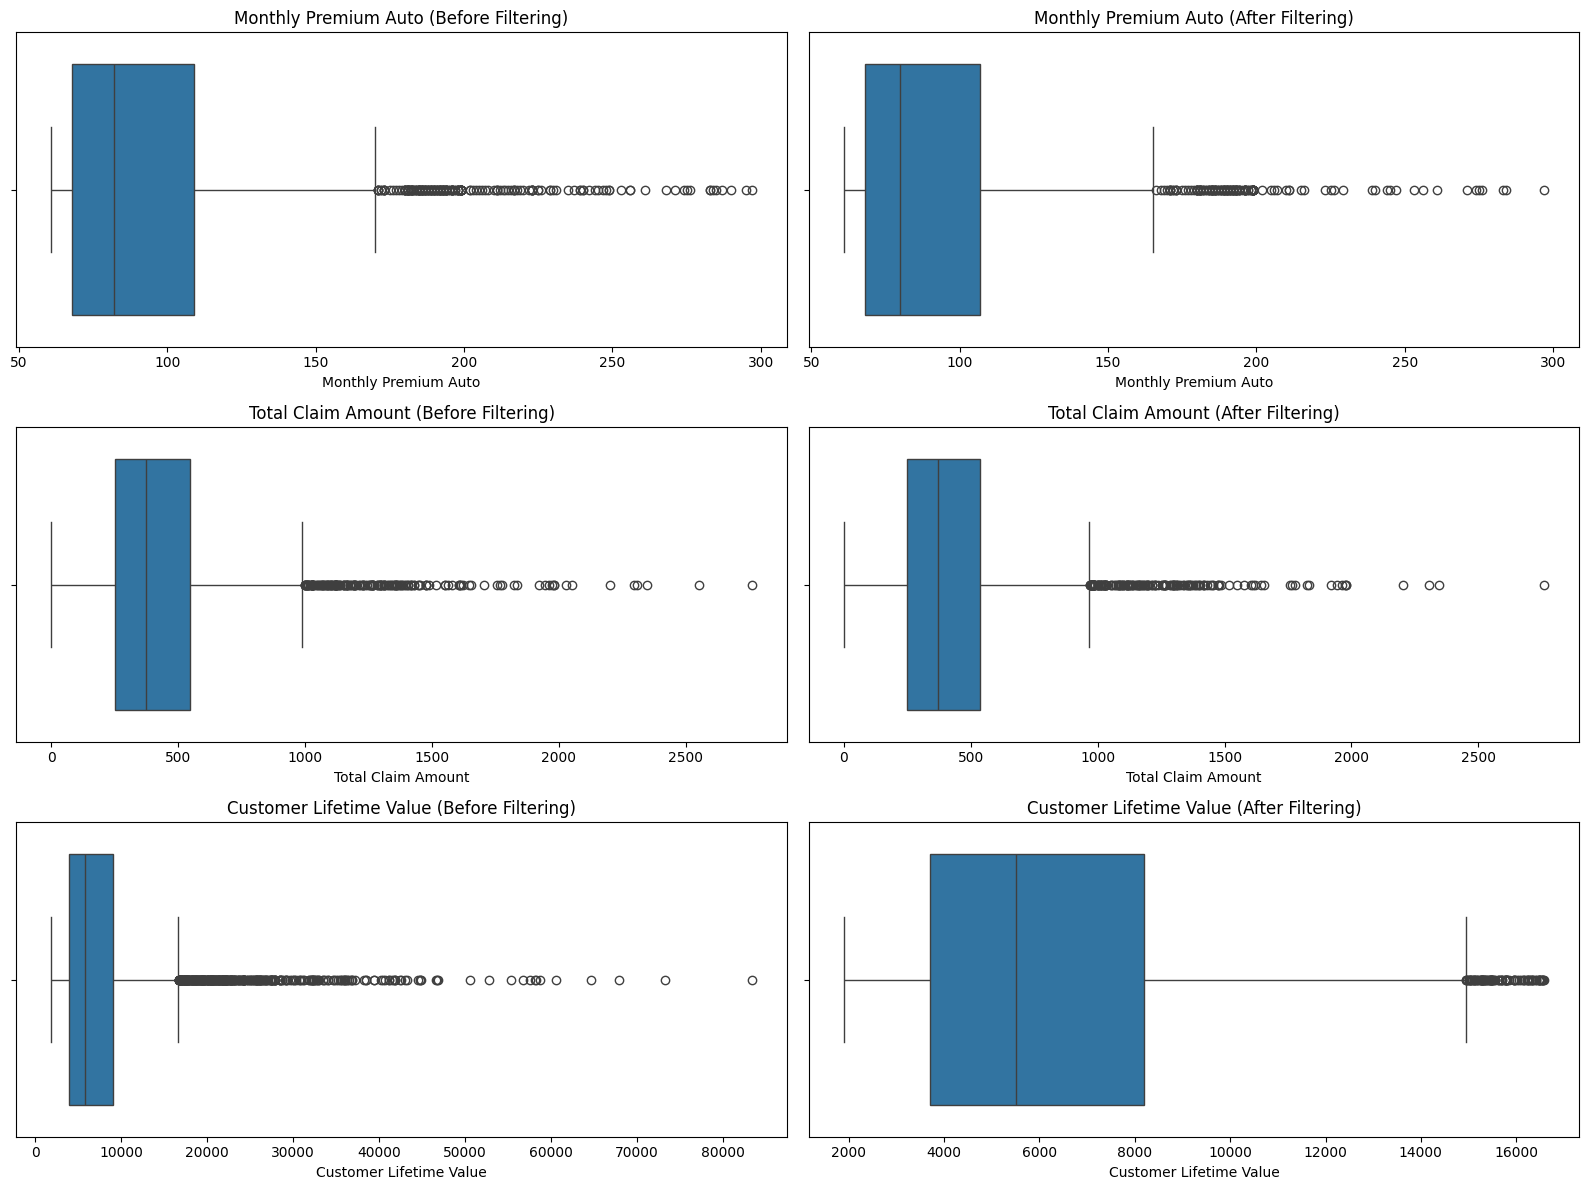

In [29]:
# Setting up the figure for all boxplots
plt.figure(figsize=(16, 12))

# Boxplot for 'Monthly Premium Auto'
plt.subplot(3, 2, 1)
sns.boxplot(data=data, x='Monthly Premium Auto').set(title='Monthly Premium Auto (Before Filtering)')

plt.subplot(3, 2, 2)
sns.boxplot(data=data3, x='Monthly Premium Auto').set(title='Monthly Premium Auto (After Filtering)')

# Boxplot for 'Total Claim Amount'
plt.subplot(3, 2, 3)
sns.boxplot(data=data, x='Total Claim Amount').set(title='Total Claim Amount (Before Filtering)')

plt.subplot(3, 2, 4)
sns.boxplot(data=data3, x='Total Claim Amount').set(title='Total Claim Amount (After Filtering)')

# Boxplot for 'Customer Lifetime Value'
plt.subplot(3, 2, 5)
sns.boxplot(data=data, x='Customer Lifetime Value').set(title='Customer Lifetime Value (Before Filtering)')

plt.subplot(3, 2, 6)
sns.boxplot(data=data3, x='Customer Lifetime Value').set(title='Customer Lifetime Value (After Filtering)')

plt.tight_layout()
plt.show()


#### Type Data Checking

In [30]:
pd.DataFrame({
    'feature'           : data3.columns.values,
    'data_type'         : data3.dtypes.values,
    'null_value(%)'     : data3.isna().mean().values * 100,
    'n_unique'          : data3.nunique().values,
    'duplicate'         : data3.duplicated().sum(),
    'Negative_value_num': [len(data3[col][data3[col] < 0])/ len(data3) * 100 if col in data3.select_dtypes(include=np.number).columns else 0 for col in data3.columns],
    'Zero_value_num'    : [len(data3[col][data3[col] == 0])/ len(data3) * 100 if col in data3.select_dtypes(include=np.number).columns else 0 for col in data3.columns],
    'Zero_value_obj'    : [len(data3[col][data3[col] == ''])/ len(data3) * 100 if col in data3.select_dtypes(include=np.object_).columns else 0 for col in data3.columns],
    'sample_unique'     : [data3[col].unique() for col in data3.columns]},
).round(3)


,feature,data_type,null_value(%),n_unique,duplicate,Negative_value_num,Zero_value_num,Zero_value_obj,sample_unique
0,Vehicle Class,object,0.0,6,0,0.0,0.000,0.0,"[Four-Door Car, Two-Door Car, SUV, Sports Car,..."
1,Coverage,object,0.0,3,0,0.0,0.000,0.0,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0.0,4,0,0.0,0.000,0.0,"[Offer1, Offer2, Offer3, Offer4]"
3,EmploymentStatus,object,0.0,5,0,0.0,0.000,0.0,"[Unemployed, Employed, Medical Leave, Retired,..."
4,Marital Status,object,0.0,3,0,0.0,0.000,0.0,"[Single, Married, Divorced]"
5,Education,object,0.0,5,0,0.0,0.000,0.0,"[High School or Below, College, Bachelor, Doct..."
6,Number of Policies,float64,0.0,9,0,0.0,0.000,0.0,"[2.0, 8.0, 9.0, 1.0, 3.0, 7.0, 6.0, 5.0, 4.0]"
7,Monthly Premium Auto,float64,0.0,155,0,0.0,0.000,0.0,"[87.0, 68.0, 82.0, 78.0, 71.0, 138.0, 95.0, 69..."
8,Total Claim Amount,float64,0.0,2432,0,0.0,0.000,0.0,"[626.4, 326.4, 393.6, 482.48791, 130.303439, 9..."
9,Income,float64,0.0,2694,0,0.0,26.157,0.0,"[0.0, 31356.0, 72608.0, 65252.0, 40417.0, 6779..."


Through pre-processing, including outlier handling, the dataset now totals 3716 rows with 11 columns. The composition of data types has become uniform and precise. This condition reflects the readiness of the dataset for further analysis, with data types that have been adapted to support specific analytical needs.

#### Rare Label

In the context of machine learning for business applications, evaluating the presence of rare labels in categorical data is an important step to maintain model accuracy. Sparse labels can cause insufficient data representation problems, increase the risk of overfitting, and reduce the generalization ability of the model. This is especially important in customer lifetime value (CLV) modeling, where each category can provide strategic insights. Therefore, proper handling of rare labels is crucial to ensure robust models and reliable prediction results for business decisions.

In [31]:
# First, we need to correctly identify the categorical columns from 'data3'
categorical_columns = data3.select_dtypes(include=['object']).columns.tolist()

# Calculate the frequency distribution for each categorical variable in percentage
label_frequency_percent = {col: data3[col].value_counts(normalize=True) * 100 for col in categorical_columns}

# The outer list corresponds to the rows of the table and the inner lists correspond to the columns of each row.
data_for_tabulate = []

# Iterate over the dictionary to populate the data for tabulate
for variable, freq_series in label_frequency_percent.items():
    data_for_tabulate.append([variable, freq_series.index[0], f"{freq_series.iloc[0]:.2f}%"])
    for idx in range(1, len(freq_series)):
        data_for_tabulate.append(["", freq_series.index[idx], f"{freq_series.iloc[idx]:.2f}%"])

# Display the frequency distribution in percentage using tabulate
print(tabulate(data_for_tabulate, headers=["Variable", "Category", "Frequency (%)"], tablefmt="pipe"))



| Variable         | Category             | Frequency (%)   |
|:-----------------|:---------------------|:----------------|
| Vehicle Class    | Four-Door Car        | 52.21%          |
|                  | Two-Door Car         | 21.56%          |
|                  | SUV                  | 18.68%          |
|                  | Sports Car           | 4.66%           |
|                  | Luxury Car           | 1.51%           |
|                  | Luxury SUV           | 1.40%           |
| Coverage         | Basic                | 62.54%          |
|                  | Extended             | 29.41%          |
|                  | Premium              | 8.05%           |
| Renew Offer Type | Offer1               | 39.26%          |
|                  | Offer2               | 30.27%          |
|                  | Offer3               | 17.20%          |
|                  | Offer4               | 13.27%          |
| EmploymentStatus | Employed             | 62.94%          |
|       

| Variable | Labels | Frequency (%) | Decision not to take action on rare labels |
|-------------------|--------------|---------------|-------------------------------------------------------------------------------------------|
| Vehicle Class | Luxury SUV | 1.40% | Represents a unique market segment with characteristics that are important for the CLV model. Omitting or combining these labels can eliminate important nuances in the model. |
| | Luxury Cars | 1.51% | Represents a unique market segment with characteristics that are important for the CLV model. Omitting or combining these labels can eliminate important nuances in the model. |
| Coverage | Premium | 8.05% | Although 'Premium' is a rare label, it can be interpreted as indicating different levels of risk and return in the CLV model. |
| Renew Offer Type | Offer4 | 13.27% | customer response to a special offer, which can influence CLV.|
| EmploymentStatus | Retired | 1.78% | Although rarely, different employment statuses have unique influences on CLV. |
 | Marital Status | Divorced | 13.62% | No labels are very rare in Marital Status. All categories had significant representation, with “Married” being the most common. |
 | Education | Doctor | 4.01% | Although rare, education level has a correlation with customer preferences and behavior, influencing CLV. |

#### Cardinality

The number of unique values ​​in a categorical feature or high cardinality in a categorical feature can cause increased data dimensionality, greater memory usage, and potential overfitting of the model. It is important to look at proper encoding methods, such as target encoding or frequency encoding, to manage high cardinality. Dimensional reduction planning can also be applied to optimize model performance.

In [32]:
# creating a function to check cardinality
def check_cardinality(data3):
    for feature in categorical:
        cardinality = len(data3[feature].unique())
        print(f"Cardinality of {feature}: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in {feature}. Consider handling it appropriately.")

check_cardinality(data3)


Cardinality of Vehicle Class: 6
Cardinality of Coverage: 3
Cardinality of Renew Offer Type: 4
Cardinality of EmploymentStatus: 5
Cardinality of Marital Status: 3
Cardinality of Education: 5


In analyzing each feature, there is no apparent need for urgent action because cardinality levels are generally under control. Selection of the appropriate encoding method becomes the main focus to manage the impact of high cardinality, considering the trade-off between feature complexity and model performance. This strategy maintains a balance between data processing efficiency and satisfactory results from the model.

#### Collinearity

In regression analysis, identifying and handling collinearity between predictor variables is an important step to ensure the accuracy and reliability of the model. Collinearity, or multicollinearity, occurs when there is a strong linear relationship between two or more predictor variables. This can result in difficulties in determining important variables, unstable regression coefficients, and increased coefficient variance, all of which contribute to reduced reliability of estimates. To detect collinearity, the two main methods that are often used are correlation matrix analysis and Variance Inflation Factor (VIF) calculations. The correlation matrix provides an overview of the relationship between variables, while the VIF measures how much the variance of a regression coefficient is increased due to multicollinearity. VIF values ​​exceeding 5 or 10 are usually considered an indicator of significant collinearity. Through this approach, it can be obtained deep insight into data structure, enabling more informed decision making in regression modeling.

C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_19128\883484922.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data3.corr()


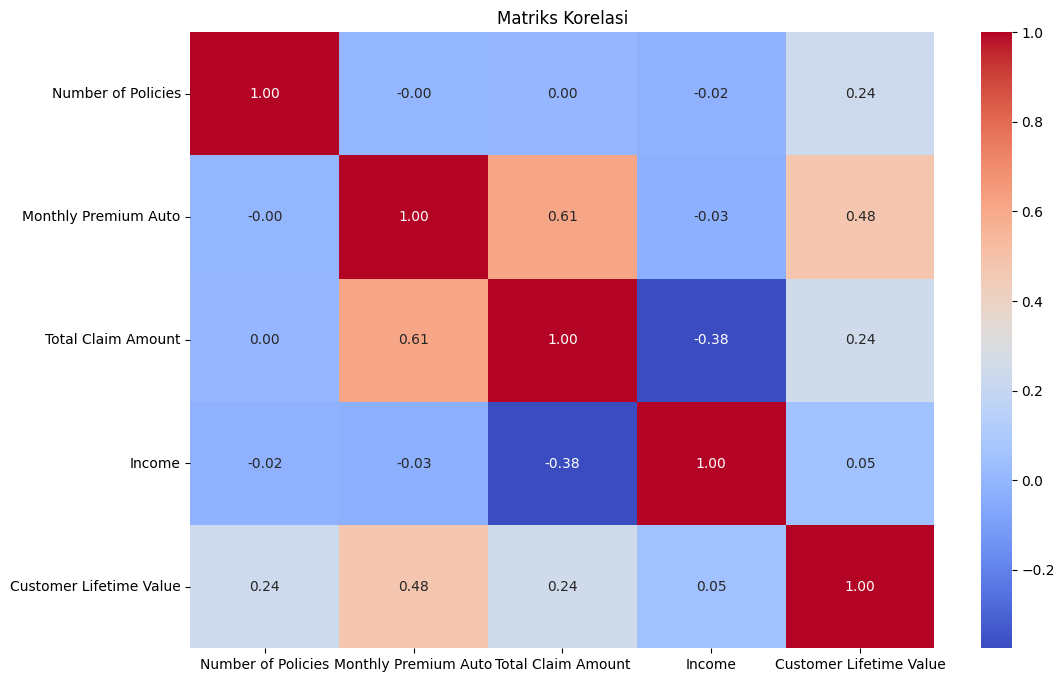

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat matriks korelasi dari data_customer
corr_matrix = data3.corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()


| Variable | Correlation with Other Variables | Interpretation |
|-------------------------|------------------------------------------------------|--------------|
| Number of Policies | Very weak with all variables | The very weak correlation indicates that the number of policies is not significantly related to other variables in this dataset. |
| Monthly Premium Auto | Moderate with Total Claim Amount (0.64) and Customer Lifetime Value (0.40); very weak with other variables | Moderate correlations with Total Claim Amount and Customer Lifetime Value indicate a more significant relationship, while very weak correlations with other variables indicate a lack of direct relationship. |
| Total Claim Amount | Moderate negative with Income (-0.35); moderate with Monthly Premium Auto (0.64); weak with other variables | Moderately negative correlations with Income and moderately positive correlations with Monthly Premium Auto indicate a stronger relationship, but a lack of correlation strong with other variables indicates limitations in the relationship. |
 | Income | Weak with all variables | The weak correlation indicates that Income is not significantly related to other variables in the context of this dataset. |
 | Customer Lifetime Value | Moderate with Monthly Premium Auto (0.40) and Total Claim Amount (0.22); very weak with other variables | Moderate correlations with Monthly Premium Auto and Total Claim Amount indicate a more significant relationship, while very weak correlations with other variables indicate a lack of direct relationship. |

Based on the correlation matrix from the data_customer dataset, it is observed that most variables exhibit very weak correlations with each other, underscoring the absence of significant linear relationships between the majority of the variables. For instance, the 'Number of Policies' shows a very weak correlation with all other variables, indicating that the number of policies a customer holds does not significantly influence other variables such as 'Income', 'Total Claim Amount', or 'Customer Lifetime Value'.

However, there are notable exceptions with moderate correlations between 'Monthly Premium Auto' and 'Total Claim Amount' (0.61), and between 'Monthly Premium Auto' and 'Customer Lifetime Value' (0.48). These moderate correlations suggest a more substantial relationship between the monthly premiums paid and the total claims made, as well as the potential value generated by a customer over their lifetime.

Despite the presence of moderate correlations in some instances, the overall weak correlation pattern across the dataset signals that there is no urgent need for specific interventions aimed at addressing collinearity issues in the regression model. The lack of strong correlations that could disrupt indicates that the construction of regression models can proceed without significant concerns over distortion due to collinearity. This allows the analytical team to focus on other critical aspects such as proper feature selection and model optimization to enhance predictive performance.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Selects only numeric columns for VIF calculations
numerical_data = data3.select_dtypes(include=[np.number])

# Added constants, which are required for VIF calculations
numerical_data_with_const = add_constant(numerical_data)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_data_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data_with_const.values, i) for i in range(numerical_data_with_const.shape[1])]

vif_data


,feature,VIF
0,const,13.023856
1,Number of Policies,1.080845
2,Monthly Premium Auto,2.097398
3,Total Claim Amount,2.016440
4,Income,1.260711
5,Customer Lifetime Value,1.408045


| Variable | VIF | Interpretation |
|------------------------------------|-------------|--------------|
| const | Height | A high VIF value for a constant is common and does not cause concern because the constant only adds a fixed term to the model and does not introduce collinearity with the predictor variables. |
| Number of Policies | Little &gt; 1 | VIF is slightly above 1, indicating no significant collinearity with other variables, which is a normal condition. |
| Monthly Premium Auto | &lt; 2 | With a VIF value below 2, this variable is proven to be quite independent from other variables and does not cause collinearity problems. |
| Total Claim Amount | &lt; 2 | Just like Monthly Premium Auto, VIF values ​​below 2 indicate no significant collinearity problems. |
| Income | Approaching 1 | A VIF close to 1 indicates that this variable is independent of the other variables in the model, which is very good. |
| Customer Lifetime Value | &lt; 1.5 | With a VIF below 1.5, there was no significant multicollinearity, indicating the independence of these variables in the model. |

Based on the results of the Variance Inflation Factor analysis, this regression model appears to be free from collinearity problems. This makes it possible to continue model development without concerns about the negative influence of multicollinearity on coefficient estimates. Therefore, no special measures are required to overcome the collinearity problem. Focus can be shifted to other aspects of the regression model, including feature selection, model tuning, and evaluation, to improve the overall effectiveness and accuracy of the model.

### Feature Engineering

Before the modeling step, the data will be separated with a proportion of 80% for training and validation, and 20% for testing. This approach is intended to optimize the model training process, but still provide sufficient datasets to test the performance of the trained model. This step is crucial to ensure that the model being developed can provide good results when faced with new data.

##### Encoding

Encoding is a method applied to convert categorical variables into numerical form in the context of machine learning. In this project, the choice of encoders used involves one-hot encoding and ordinal encoding. One-hot encoding is applied to nominal categorical features because these features have a limited number of unique values ​​and do not have a hierarchy between their values. Meanwhile, ordinal encoding is used for ordinal categorical features that have a certain level or order. The following is the distribution of encoders used:


| Tipe Encoding    | Feature                                      |
|------------------|--------------------------------------------|
| One-hot encoding | `Vehicle Class`, `EmploymentStatus`, `Renew Offer Type`, `Marital Status` |
| Ordinal encoding | `Coverage`, `Education`                     |


The encoding process will be carried out using ColumnTransformer, and the results will be integrated into the modeling process using Pipeline.

##### Scalling

In adjusting the data scale, the use of RobustScaler was chosen as the initial step for cross-validation. RobustScaler was chosen because its method is more robust to outliers. By relying on medians and quartiles, RobustScaler makes its scale more stable to values ​​that fall far from the majority of the data, making it a good choice for dealing with outliers.

The selection of RobustScaler at an early stage forms a strong basis for cross-validation. In the next Hyperparameter Tuning stage, evaluation is carried out to determine the optimal scale to improve model performance. This approach provides the flexibility to adjust scaling as the model develops and the dataset is better understood

In [35]:
# Define scaler
robust = RobustScaler()

##### Feature Creation

In the context of this project, an in-depth evaluation of the dataset has shown that the available data covers the main aspects required for a Customer Lifetime Value (CLV) prediction model. Because the data provided comprehensive insight into customer behavior and characteristics, the decision was made not to build additional features. This decision was based on careful analysis that confirmed that existing features adequately represent the dynamics and factors that influence customer lifetime value. The primary focus is on making maximum use of readily available information, ensuring efficiency in the analytical process, and avoiding unnecessary complexity.

##### Feature Selection

Considering the results of the cardinality and collinearity analyzes that have been carried out, no significant problems have been identified that require feature elimination or modification. Therefore, all available features in the dataset are selected for inclusion in the initial model. This approach allows companies to access the entire spectrum of available information, ensuring that no potential insight is missed. This step also accommodates the intrinsic complexity in customer data, with the aim of developing an accurate and comprehensive model, which can capture the various aspects that influence CLV in a real business context.

##### Pipeline

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import OrdinalEncoder as ce_OrdinalEncoder

# Customize Transformer to remove outliers
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.feature_names_in_ = X.columns
        return self

    def transform(self, X, y=None):
        outlier_condition = (
            (X['Monthly Premium Auto'] <= 397.41) &
            (X['Total Claim Amount'] <= 4326)
        )
        if y is not None:
            outlier_condition = outlier_condition & (y <= 16624.75)
            return X[outlier_condition], y[outlier_condition]
        return X[outlier_condition]

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return self.feature_names_in_
        else:
            return input_features

# Combining the encoder in a column transformer
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', 'Marital Status']),
    ('ordinal', ce_OrdinalEncoder(cols=['Coverage', 'Education']), ['Coverage', 'Education']),
    ('scaler', RobustScaler(), ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income'])
], remainder='passthrough')

# Main pipeline with regression models
pipeline = Pipeline(steps=[
    ('remove_outliers', OutlierRemover()),
    ('preprocessor', preprocessor)
])

pipeline

Pipeline(steps=[('remove_outliers', OutlierRemover()),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'EmploymentStatus',
                                                   'Renew Offer Type',
                                                   'Marital Status']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['Coverage',
                                                                       'Education']),
                                                  ['Coverage', 'Education']),
                                                 ('scaler', RobustScaler(),
                                                  ['Number of Policies',
                                                   'Monthly Premium Auto',
                                                   'Total Claim Amount',
                                                   'Income'])]))])

### Pipeline Map Explanation

The data preprocessing pipeline is constructed using a `Pipeline` object, which sequentially applies a list of transforms and a final estimator. The main steps involved in this pipeline are:

1. **Outlier Removal**: The first step is an `OutlierRemover` transform. This component is responsible for detecting and removing outliers from the dataset to prevent them from skewing the results of the analysis.

2. **Preprocessing**: The main preprocessing of the data is handled by a `ColumnTransformer` object, which applies different transformations to subsets of features:

   - **One-Hot Encoding**: Categorical features like 'Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', and 'Marital Status' are transformed using `OneHotEncoder`, which converts these categories into a form that could be provided to ML algorithms to do a better job in prediction.

   - **Ordinal Encoding**: Some categorical features that have a meaningful order are encoded ordinally using `OrdinalEncoder`. In this pipeline, 'Coverage' and 'Education' are such features, where the order of the categories is significant and is preserved in the transformation.

   - **Scaling**: The numerical features 'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', and 'Income' are scaled using `RobustScaler`. This scaler is robust to outliers and ensures that the numerical features are on the same scale, so that no individual feature can dominate the model training process due to its scale.

The combination of these preprocessing steps within a pipeline ensures that the data fed into the machine learning model is clean, appropriately formatted, and ready for training.


## **Modeling**

- Setup Pycaret Environmernt

In [37]:
from pycaret.regression import *
from pycaret.regression import setup, create_model

setup(data=data3, target='Customer Lifetime Value', preprocess=False, train_size=0.8, custom_pipeline=pipeline, session_id=123)


,Description,Value
0,Session id,123
1,Target,Customer Lifetime Value
2,Target type,Regression
3,Original data shape,"(3716, 11)"
4,Transformed data shape,"(3716, 21)"
5,Transformed train set shape,"(2972, 21)"
6,Transformed test set shape,"(744, 21)"
7,Numeric features,4
8,Categorical features,6


### Benchmark Mode

### Benchmark Models

In the pursuit of developing a robust predictive model, two benchmark models are established to serve as points of comparison for further refined models. The benchmarks are as follows:

1. **Resample Model**: This model is created after applying resampling techniques to the dataset. Resampling is a method used to correct imbalances within the data, which can be particularly important when the dataset contains a disproportionate ratio of observations in different classes or in the case of regression, a wide variance in the target variable. By resampling, we ensure that the model does not become biased towards the majority class or the more frequent value ranges of the target.

2. **Without Resample Model**: The second benchmark model is constructed without the use of resampling techniques. This model will reflect the performance on the unaltered dataset, maintaining the original distribution of the data. The comparison against the Resample Model allows us to understand the impact of the resampling process on model performance.

Both models will be evaluated based on a set of predetermined metrics:

- **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in a set of predictions, without considering their direction. Lower MAE values indicate better model performance.
  
- **R-Squared (R2)**: Represents the proportion of the variance for the target that's explained by the independent variables in the model. An R2 of 1 indicates that the regression predictions perfectly fit the data.
  
- **Mean Absolute Percentage Error (MAPE)**: Expresses the accuracy as a percentage of the error. Lower MAPE values indicate higher accuracy of the model in predicting the data.

The model that performs better across these metrics will be considered a more accurate and reliable benchmark, guiding the subsequent steps in the model development process.


### 3 Best Model (With Resampling K-fold CV)

In [38]:

# Menjalankan model dan memilih tiga model terbaik
top3_models = compare_models(n_select=3)

# Mengumpulkan nama model dan tiga parameter pertama
model_info = []
for model in top3_models:
    model_name = model.__class__.__name__
    params = model.get_params()
    
    # Mengambil hanya tiga parameter pertama
    first_three_params = {k: params[k] for k in list(params)[:3]}
    
    model_info.append([model_name, first_three_params])

# Membuat tabel menggunakan tabulate
table = tabulate(model_info, headers=["Model Name", "First Three Parameters"], tablefmt="github")

print(table)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,409.1574,903394.4379,941.8875,0.9203,0.0958,0.0532,0.0780
rf,Random Forest Regressor,373.2159,927249.6006,954.0352,0.9183,0.0930,0.0448,0.2150
lightgbm,Light Gradient Boosting Machine,402.7158,958217.8877,970.6286,0.9155,0.0979,0.0522,0.0970
et,Extra Trees Regressor,447.6136,1058101.0928,1015.6831,0.9069,0.1122,0.0648,0.1570
xgboost,Extreme Gradient Boosting,458.1078,1071398.7062,1025.1322,0.9056,0.1200,0.0686,0.1630
dt,Decision Tree Regressor,473.4140,1753005.0068,1315.3702,0.8445,0.1255,0.0578,0.0160
ada,AdaBoost Regressor,1022.9840,2023067.9712,1421.6379,0.8193,0.1829,0.1558,0.0250
br,Bayesian Ridge,2098.4395,7918692.6499,2808.7312,0.2969,0.4269,0.3835,0.0190
llar,Lasso Least Angle Regression,2096.7014,7924769.3756,2809.7429,0.2964,0.4265,0.3822,0.0160
lasso,Lasso Regression,2096.7035,7924778.7120,2809.7448,0.2964,0.4265,0.3822,0.2110


| Model Name                | First Three Parameters                                                   |
|---------------------------|--------------------------------------------------------------------------|
| GradientBoostingRegressor | {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse'}            |
| RandomForestRegressor     | {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error'}      |
| LGBMRegressor             | {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0} |


- Result top 3 model from benchmark model (resample)

| Model        | MAE      | R2    | MAPE   |
|--------------|----------|-------|--------|
| gbr          | 409.1574 | 0.9203| 0.0532 |
| rf           | 373.2159 | 0.9183| 0.0448 |
| lightgbm     | 402.7158 | 0.9155| 0.0522 |



- `(gbr)` The Gradient Boosting Regressor shows a strong performance across all three metrics, indicating high accuracy and a model that explains a significant portion of the variance in the dataset.
- `(rf)` Random Forest Regressor has the lowest MAE, suggesting that on average, the predictions are closer to the actual values. The R2 is slightly lower than the Gradient Boosting Regressor, but still very high, and it has the best MAPE score, indicating high relative accuracy.
- `(lightgbm)` Light Gradient Boosting Machine offers competitive results with a good balance across all metrics, although it is slightly outperformed by the Gradient Boosting Regressor and Random Forest Regressor.





### 3 Best Model (Without Resampling K-fold CV)

Beri insight benchmark model without resampling

In [39]:
# without resampling
top3_models_unresampling = compare_models(n_select=3,cross_validation=False)

# Mengumpulkan nama model dan tiga parameter pertama
model_info = []
for model in top3_models_unresampling:
    model_name = model.__class__.__name__
    params = model.get_params()
    
    # Mengambil hanya tiga parameter pertama
    first_three_params = {k: params[k] for k in list(params)[:3]}
    
    model_info.append([model_name, first_three_params])

# Membuat tabel menggunakan tabulate
table = tabulate(model_info, headers=["Model Name", "First Three Parameters"], tablefmt="github")

print(table)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:00:26
Status,. . . . . . . . . . . . . . . . . .,Fitting Linear Regression
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,396.4924,793131.8673,890.5795,0.9247,0.0924,0.0519,0.3800
lightgbm,Light Gradient Boosting Machine,396.2628,882997.3512,939.6794,0.9162,0.0941,0.0501,0.1100
rf,Random Forest Regressor,387.0000,895052.8846,946.0723,0.9150,0.0924,0.0459,0.3200
et,Extra Trees Regressor,426.3381,931788.8768,965.2921,0.9116,0.1028,0.0588,0.2300
xgboost,Extreme Gradient Boosting,487.4588,991731.9375,995.8574,0.9059,0.1187,0.0726,0.1800
ada,AdaBoost Regressor,1025.8963,1922731.8015,1386.6260,0.8175,0.1835,0.1586,0.1300
dt,Decision Tree Regressor,519.1722,1930931.1315,1389.5795,0.8167,0.1273,0.0619,0.0500
br,Bayesian Ridge,2015.4245,7458406.8330,2731.0084,0.2920,0.4107,0.3563,0.0400
llar,Lasso Least Angle Regression,2016.2890,7483956.2861,2735.6821,0.2896,0.4112,0.3558,0.0300
lasso,Lasso Regression,2016.2879,7483960.6989,2735.6829,0.2896,0.4112,0.3558,0.0300


| Model Name                | First Three Parameters                                                   |
|---------------------------|--------------------------------------------------------------------------|
| GradientBoostingRegressor | {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse'}            |
| LGBMRegressor             | {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0} |
| RandomForestRegressor     | {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error'}      |


- Result top 3 model from benchmark model (Without Resample)

The following table summarizes the performance of the benchmark models evaluated without the use of resampling techniques, using the Mean Absolute Error (MAE), R-Squared (R2), and Mean Absolute Percentage Error (MAPE) as metrics.

| Model     | MAE       | R2     | MAPE   | TT (Sec) |
|-----------|-----------|--------|--------|----------|
| gbr       | 396.4924  | 0.9247 | 0.0519 | 0.4100   |
| lightgbm  | 396.2628  | 0.9162 | 0.0501 | 0.1300   |
| rf        | 387.0000  | 0.9150 | 0.0459 | 0.3100   |


The top three models for the non-resampled benchmark, based on these metrics, are:

1. **Gradient Boosting Regressor (gbr)**:
   - Exhibits high accuracy with the lowest MAE and the highest R2, indicating it performs well on average and explains a significant variance in the dataset.

2. **Light Gradient Boosting Machine (lightgbm)**:
   - Close to gbr in terms of MAE and R2, with a slightly better MAPE. Its fast training time (TT) makes it an efficient model.

3. **Random Forest Regressor (rf)**:
   - Has the lowest MAE, indicating on average the most accurate predictions, and a competitive R2 score, suggesting it also explains a good proportion of variance.

These models without resampling perform well across the selected metrics, which are crucial for regression tasks. The MAE indicates the average error magnitude, R2 reflects the explained variance, and MAPE provides insight into the prediction accuracy relative to the true values. Considering these metrics, the models listed above are the best candidates as benchmarks for this project.


### Evaluate the best benchmark Model Performance

- comparasion result

|**Condition**              | **Model**      | **MAE**  | **R2**  | **MAPE** |
|---------------------------|----------------|----------|---------|----------|
|With Resample              |- gbr          | 409.1574  | 0.9203 | 0.0532 |
|                           |- rf           | 373.2159  | 0.9183 | 0.0448 |
|                           |- lightgbm     | 402.7158  | 0.9155 | 0.0522 |
|Without Resample           |- gbr          | 396.4924  | 0.9247 | 0.0519 |
|                           |- rf           | 387.0000  | 0.9150 | 0.0459 |
|                           |- lightgbm     | 396.2628  | 0.9162 | 0.0501 |


Random Forest Regressor Performance: In the resampled benchmark, the Random Forest Regressor exhibits a lower MAE and the best MAPE compared to its performance without resampling. This indicates that on average, the predictions are closer to actual values and the relative error size is smaller, signifying higher prediction accuracy therefore we will tuning the best 3 model from benchmark model (resample)

### Tuning 3 Best Model

### Gradient Boosting Regressor (gbr)  

- Create model for tuning

In [40]:
gbr_bm1         = create_model(top3_models[0])
rf_bm1          = create_model(top3_models[1])
lightgbm_bm1    = create_model(top3_models[2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,419.0615,963116.6896,981.3851,0.9135,0.1010,0.0560
1,420.2078,1066259.6952,1032.5985,0.9024,0.1023,0.0530
2,332.4210,583294.2124,763.7370,0.9445,0.0737,0.0434
3,372.6711,823296.0075,907.3566,0.9315,0.0927,0.0505
4,405.1562,885792.7770,941.1656,0.9197,0.0943,0.0520
5,394.3616,504530.0475,710.3028,0.9498,0.0857,0.0572
6,417.0585,1122016.2231,1059.2527,0.9081,0.1011,0.0511
7,387.0957,730967.5475,854.9664,0.9339,0.0901,0.0530
8,444.6271,1076573.2368,1037.5805,0.9068,0.1004,0.0543


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,374.1542,954132.7839,976.7972,0.9143,0.0937,0.0443
1,351.6806,781560.1045,884.0589,0.9284,0.0822,0.0410
2,297.0287,572149.0295,756.4053,0.9455,0.0713,0.0363
3,356.7806,957657.9257,978.6000,0.9203,0.0945,0.0429
4,369.5561,871777.8049,933.6904,0.9210,0.0943,0.0461
5,352.7030,625872.8304,791.1212,0.9377,0.0874,0.0485
6,403.4108,1119696.8511,1058.1573,0.9083,0.0997,0.0463
7,359.8586,764555.7983,874.3888,0.9309,0.0889,0.0463
8,401.5369,1154049.9242,1074.2672,0.9001,0.1020,0.0468


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,379.2548,865622.9925,930.3886,0.9222,0.0938,0.0506
1,391.3405,999436.0019,999.7180,0.9085,0.0954,0.0480
2,332.2541,596239.1220,772.1652,0.9432,0.0763,0.0448
3,379.6710,912474.5996,955.2354,0.9241,0.0956,0.0495
4,415.5359,981857.3525,990.8872,0.9110,0.1032,0.0546
5,388.1375,634407.7459,796.4972,0.9369,0.0922,0.0575
6,445.6349,1322011.3031,1149.7875,0.8918,0.1117,0.0548
7,379.0129,757307.0034,870.2339,0.9315,0.0932,0.0527
8,433.3460,1207691.1379,1098.9500,0.8955,0.1066,0.0530


#### cross-validation gbr

In [41]:
gbr_cv = create_model('gbr', fold=10, cross_validation=True, return_train_score=True, verbose=True )


#### Hyperparameter (tuned-gbr) 

In [42]:
from pycaret.regression import tune_model

# Gradient Boosting Regressor Hyperparameters
hpgbr = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Tuning untuk Gradient Boosting Regressor
print('Model 1 (Tuned Gradient Boosting Regressor)')
tuned_gbr = tune_model(
    estimator=gbr_bm1,
    custom_grid=hpgbr,
    optimize='mape',
    search_library='scikit-learn',
    search_algorithm='grid',
    choose_better=True,
    return_train_score=True,
    verbose=True
)


Model 1 (Tuned Gradient Boosting Regressor)


Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Random Forest Regressor (rf) 

#### cross-validation rf

In [43]:
rf_cv = create_model('rf', fold=10, cross_validation=True, return_train_score=True, verbose=True )


#### Hyperparameter (tuned-rf) 

In [44]:

# Random Forest Regressor Hyperparameters
hprf = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


# Tuning for Random Forest Regressor
print('Model 2 (Tuned Random Forest Regressor)')
tuned_rf = tune_model(
    estimator=rf_bm1,
    custom_grid=hprf,
    optimize='mape',
    search_library='scikit-learn',
    search_algorithm='grid',
    choose_better=True,
    return_train_score=True,
    verbose=True
)


Model 2 (Tuned Random Forest Regressor)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:04:33
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


### Light Gradient Boosting Machine (lightgbm)

#### cross-validation lightgbm

In [45]:
lightgbm_cv = create_model('lightgbm', fold=10, cross_validation=True, return_train_score=True, verbose=True )

#### Hyperparameter (tuned-lightgbm)

In [46]:
from pycaret.regression import evaluate_model

# LightGBM Hyperparameters
hplightgbm = {
    'n_estimators': [75, 100, 125],
    'num_leaves': [31, 41, 51, 61],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'feature_fraction': [0.6, 0.8, 1.0],  
    'bagging_fraction': [0.6, 0.8, 1.0],  
    'bagging_freq': [1, 2, 4]  
}


# Tuning for LightGBM Regressor
print('Model 3 (Tuned LightGBM Regressor)')
tuned_lightgbm = tune_model(
    estimator=lightgbm_bm1,
    custom_grid=hplightgbm,
    optimize='mape',
    search_library='scikit-learn',
    search_algorithm='grid',
    choose_better=True,
    return_train_score=True,
    verbose=True  
)
# Evaluate the model to see cross-validation results
evaluate_model(tuned_lightgbm)

# Pull the results to display in a table
results = pull()


Model 3 (Tuned LightGBM Regressor)


Fitting 10 folds for each of 972 candidates, totalling 9720 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### insight beri interpretasi nya

These models outperform others in terms of the selected metrics, which are crucial for regression tasks. `MAE` provides a clear measure of average error magnitude, `R2` indicates the proportion of variance captured by the model, and `MAPE` offers an understanding of the error relative to the true values. Together, these metrics provide a comprehensive view of model performance, making the Random Forest, Gradient Boosting, and Light Gradient Boosting models the most suitable choices for this task.

|**Condition**                  | **Model**       | **MAE**  | **R2**   | **MAPE** |
|-------------------------------|-----------------|----------|----------|----------|
| Resampling (train)            |- tuned_gbr      | 334.7176 | 0.9490   | 0.0456   |
| Resampling  (val)             |- tuned_gbr      | 452.9192 | 0.9130   | 0.0609   | 
|                               |                 |          |          |          |
| Resampling  (train)           |- tuned_rf       | 253.4375 | 0.9611   | 0.0303   |
| Resampling  (val)             |- tuned_rf       | 369.3055 | 0.9201   | 0.0438   |
|                               |                 |          |          |          |
| Resampling  (train)           |- tuned_lighgbm  | 260.8135 | 0.9612   | 0.0325   |
| Resampling  (val)             |- tuned_lighgbm  | 372.0836 | 0.9186   | 0.0447   |


Model Selection:
The `tuned_rf` (`Random Forest`) model is the best performer both on the training and validation resampled datasets. It has consistently shown the lowest `MAE`, indicating that its predictions are closest to the actual values. Its `R2` is the highest, suggesting it can explain the most variance out of all the models, and it has the lowest `MAPE`, which means its percentage errors are smaller relative to the actual values.



## Finalize pipeline and model

In [47]:
from pycaret.regression import plot_model

# Finalize Model
clv_model = finalize_model(tuned_rf)
clv_model

Pipeline(memory=Memory(location=None),
         steps=[('custom_step',
                 TransformerWrapper(transformer=Pipeline(steps=[('remove_outliers',
                                                                 OutlierRemover()),
                                                                ('preprocessor',
                                                                 ColumnTransformer(remainder='passthrough',
                                                                                   transformers=[('onehot',
                                                                                                  OneHotEncoder(drop='first'),
                                                                                                  ['Vehicle '
                                                                                                   'Class',
                                                                                                   'EmploymentStatus',
                                                                                                   'Renew '
                                                                                                   'Offer '
                                                                                                   'Type',
                                                                                                   'Marital '
                                                                                                   'Status']),
                                                                                                 ('ordinal',
                                                                                                  Ordinal...
                                                                                                   'Education']),
                                                                                                 ('scaler',
                                                                                                  RobustScaler(),
                                                                                                  ['Number '
                                                                                                   'of '
                                                                                                   'Policies',
                                                                                                   'Monthly '
                                                                                                   'Premium '
                                                                                                   'Auto',
                                                                                                   'Total '
                                                                                                   'Claim '
                                                                                                   'Amount',
                                                                                                   'Income'])]))]))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 RandomForestRegressor(max_features='auto', min_samples_leaf=4,
                                       min_samples_split=5, n_estimators=150,
                                       n_jobs=-1, random_state=123))])

Explanation of the New Pipeline:

- Custom Step (TransformerWrapper): This component acts as a wrapper for specialized transformations which may include data pre-processing procedures prior to entering the main stages of the pipeline.

- Outlier Removal: Inside the custom step, there's a Pipeline with an OutlierRemover. This indicates an initial data cleaning step that focuses on identifying and removing outliers from the dataset to improve model reliability and accuracy.

- Preprocessing (ColumnTransformer): This is used to apply specific transformations to selected columns in the dataset. The transformations included are:

    - One-Hot Encoding: Categorical features like 'Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', and 'Marital Status' are converted into a binary representation that machine learning algorithms can work with using OneHotEncoder, with the first category being dropped to avoid redundancy.

    - Ordinal Encoding: Some features have an order or rank to them (like 'Coverage' and 'Education') and are encoded using OrdinalEncoder. This maintains the order of the categories in a numerical format suitable for modeling.

    - Scaling: Numerical features such as 'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', and 'Income' are scaled using RobustScaler to ensure that they are on a similar scale and to reduce the influence of outliers.

- Column Name Cleaning (TransformerWrapper): After preprocessing, this step ensures that column names are clean and standardized before modeling. This is crucial for keeping track of features after transformations and for model interpretability.

- Model Estimation (RandomForestRegressor): The terminal stage of the pipeline is the modeling step where a RandomForestRegressor is employed. This machine learning model is known for its performance and robustness, being an ensemble of decision trees. The displayed parameters such as the number of estimators (trees), minimum samples per leaf, and random state, provide insight into the model's configuration that has been set to capture complex relationships in the data without overfitting.

## Evaluation the Final Model

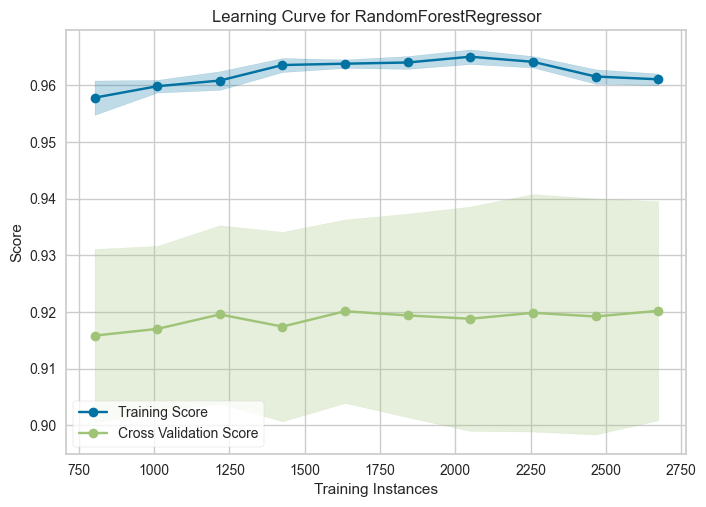

In [48]:
# Plot learning curve untuk model regresi
# gbr adalah objek model yang telah dilatih
plot_model(clv_model, plot='learning')


- **Learning Curve**

By using learning curve visualization, this can provide an overview of the results of model training. A good model will provide a display where the two lines approach each other and both achieve a high level of accuracy. This shows that the model can generalize on new data with the results that the model has learned

in this case it can represent that the model has a level of over fitting where the training model line shows higher performance than the validation model line which has quite a significant distance between the two. This can occur when the dataset does not have enough data for the model to have more optimal training

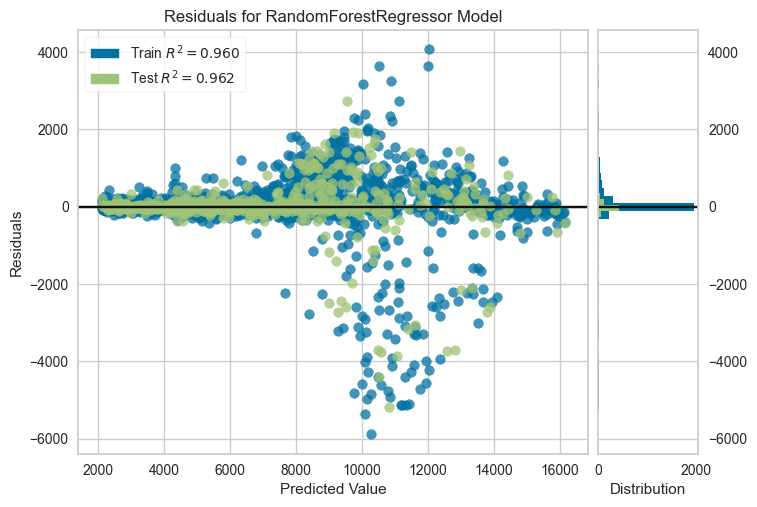

In [49]:
plot_model(clv_model, plot='residuals')

- Residual

Model Performance:

R² for training data is 0.960 and for test data is 0.962. An R² value close to 1 indicates that the model has a high degree of fit to the data. This indicates that the model performs very accurate predictions on both data sets.
Residual Distribution:

There is a subplot that shows the residual distribution. It should show a normal distribution if the model has captured all aspects of the data correctly. However, there appears to be some skewness or deviation from normality because there are more points on one side of the zero line.
Residual Pattern:

The residuals appear random around the zero horizontal line, indicating that there are no obvious systematic patterns missed by the model. There is no obvious parabolic shape or linear structure, which usually indicates bias in the model.

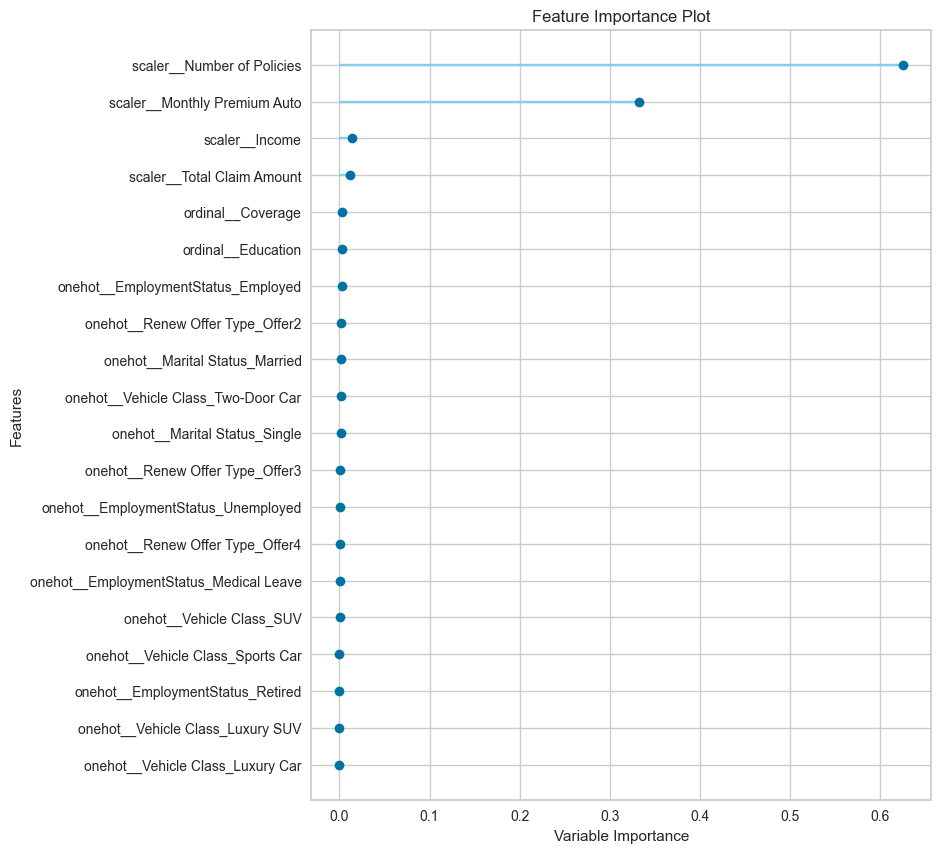

In [50]:
plot_model(clv_model, plot='feature_all')

The feature importance graph you uploaded illustrates the relative contribution of various features in the ExtraTreesRegressor regression model. The interpretation of this visualization is as follows:

Scale Features: Features such as Number of Policies, Monthly Premium Auto, Income, and Total Claim Amount appear to have high significance to the model. This shows that financial factors and insurance policies greatly influence the prediction model.

Ordinal Features: Coverage and Education appear to contribute to the model. This indicates that the level of customer protection and education is also important in the model's predictions.

One-hot Encoded Feature: Various categories represented through one-hot encoding such as employment status, renewal offer type, marital status, and vehicle class provide additional information relevant to the model. These features may reflect how certain demographic and product aspects influence behavior or decisions customer.

 Vehicle Category Variables: Vehicle categories such as Two-Door Car, SUV, Sports Car, Luxury SUV, and Luxury Car provide insight into how vehicle type contributes to model predictions. This indicates different preferences or risks associated with different vehicle types.

 From this graph, we can conclude that factors related to the customer's financial profile, policy characteristics, and their vehicle type are the most influential in predicting the modeled outcomes. Demographic and product aspects are also relevant, although with a lower contribution. This provides insurance companies with valuable insight into what factors are most important when evaluating risk and determining premiums.

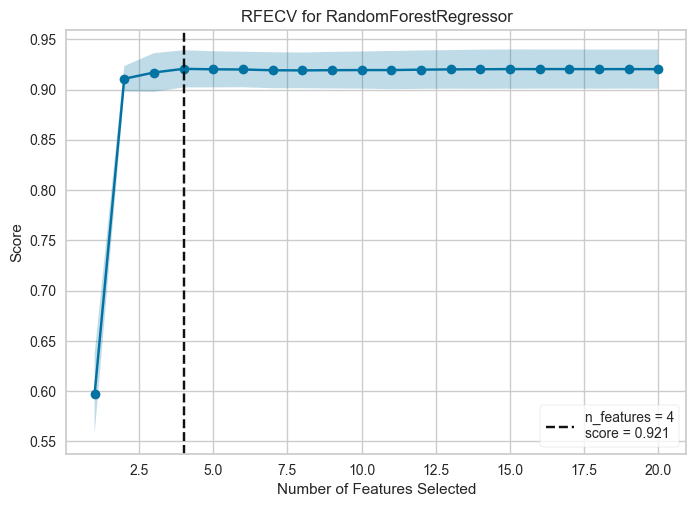

In [51]:
plot_model(clv_model, plot='rfe')

The RFECV (Recursive Feature Elimination with Cross-Validation) graph for RandomForestRegressor shows the feature selection process to find the optimal number of features for the prediction model:

A sharp increase in model score occurs when the number of features increases from 1 to 4.

The maximum cross-validation score was achieved with 4 features, as shown by the vertical dotted line, with a score of approximately 0.921.

After 4 features, additional features did not cause a significant increase in the score, indicating that the 4 features were sufficient for the model to achieve near-optimal performance.

The score stabilizes above 0.92 even though the number of features continues to increase, indicating that additional features do not contribute significantly to model accuracy.

In conclusion, the prediction model achieves the highest efficiency with only 4 features, and additional features do not provide significant performance improvements. This suggests that focused and appropriate feature selection can produce more robust models concise and efficient without sacrificing prediction accuracy.

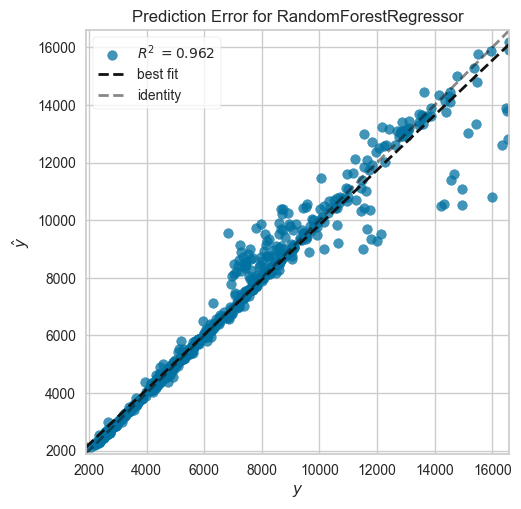

Maximum Error Difference from Actual Value = 5166.087796942458
Smallest Positive Difference:  0.09207527741546073
Least Negative Difference:  -0.041597186302169575
Minimum Error Difference from Actual Value = -2733.395046848107
Number of Overestimations = 392
Number of Underestimations = 352
Number of Predictions Matching Actual Data Exactly = 0


In [61]:
# Generate predictions using the predictive model
predictions = predict_model(clv_model, verbose=True)

# Plot the error for the given model
plot_model(clv_model, plot='error')

# Calculate the differences between actual and predicted values
differences = predictions['Customer Lifetime Value'] - predictions['prediction_label']

# Identify the differences that are exactly zero, positive, and negative
no_differences = differences[differences == 0]
positive_differences = differences[differences > 0]
negative_differences = differences[differences < 0]

# Print out the various statistics
print(f"Maximum Error Difference from Actual Value = {differences.max()}")
print("Smallest Positive Difference: ", positive_differences.min())
print("Least Negative Difference: ", negative_differences.max())
print(f"Minimum Error Difference from Actual Value = {differences.min()}")
print(f"Number of Overestimations = {positive_differences.count()}")
print(f"Number of Underestimations = {negative_differences.count()}")
print(f"Number of Predictions Matching Actual Data Exactly = {no_differences.count()}")


**Identity line (dashed line)**: This is the line where the perfect predicted value would lie. If the model predictions exactly match the actual values, then the data points will lie on this line.

**Best fit line (thick line)**: This is the line that shows the trend of the model predictions based on the data. The closer the data points are to this line, the more accurate the model predictions.

**Coefficient of determination (R² = 0.962)**: A very high R² value (0.962) indicates that the model is very good at predicting the target variable. About 96.2% of the variation of the target variable can be explained by the model, indicating excellent performance.

**Data points (blue)**: Show individual predictions from the model. The scatter shows the variation of the predictions compared to the actual values.

Maximum value error difference from actual price: This is the maximum difference by which the model overpredicts the price. In your case, the maximum difference is 5166.0878.

**The most positive difference small**: This is the smallest difference by which the model overpredicts the price. In your case, the smallest positive difference is 0.0921.

 **Smallest negative margin**: This is the smallest margin by which the model underpredicts the price. In your case, the smallest negative difference is -0.0416.

 **Minimum value error difference from actual price**: This is the maximum difference by which the model falls short in predicting the price. In your case, the minimum difference is -2733.3950.

 **Amount of Data Overfitting and Data Underfitting**: The amount of over- and under-prediction can give an idea of ​​how well the model can adapt to the data. In your case, there are 392 overpredictions and 352 underpredictions, indicating a fairly balanced distribution.

## Time Complexity

In [53]:
import time

# Menghitung waktu yang diperlukan untuk melatih model
start_time = time.time()
# gbr adalah objek model yang telah dilatih
tuned_rf = create_model(clv_model)
end_time = time.time()
time_taken = end_time - start_time
print(f"Waktu yang diperlukan untuk melatih model rf: {time_taken} detik")


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:44:28
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,364.9740,934860.3378,966.8818,0.9160,0.0920,0.0425
1,362.2010,926327.0470,962.4589,0.9152,0.0884,0.0411
2,299.0087,540710.1044,735.3299,0.9485,0.0677,0.0359
3,347.8877,880218.7012,938.1997,0.9267,0.0914,0.0420
4,374.0374,887257.7365,941.9436,0.9196,0.0943,0.0458
5,343.3901,552300.5802,743.1693,0.9450,0.0838,0.0472
6,396.4086,1134244.8514,1065.0093,0.9071,0.0992,0.0445
7,335.4640,667294.6979,816.8811,0.9397,0.0829,0.0432
8,408.5120,1170986.5225,1082.1213,0.8986,0.1035,0.0471


Waktu yang diperlukan untuk melatih model rf: 9.870099782943726 detik


The time required to train the `Tuned Random Forest Regressor` model on the data was approximately `9.87 seconds`, indicating efficiency in model development and adjustment.

## Validation Model 

In [54]:
# prediksi data train
seen = predict_model(clv_model)
seen.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,prediction_label
4420,Four-Door Car,Basic,Offer4,Employed,Married,College,5.0,63.0,302.399994,29256.0,4918.916504,4943.969091
400,Four-Door Car,Basic,Offer3,Unemployed,Married,Bachelor,2.0,61.0,439.200012,0.0,11510.360352,9011.751779
2841,Luxury Car,Basic,Offer2,Unemployed,Single,High School or Below,9.0,197.0,1418.400024,0.0,13883.329102,13627.667508
4426,Four-Door Car,Extended,Offer1,Unemployed,Married,High School or Below,2.0,80.0,384.000000,0.0,9087.586914,9657.342620
3278,Sports Car,Basic,Offer1,Unemployed,Single,High School or Below,4.0,106.0,508.799988,0.0,7413.386719,7558.692594


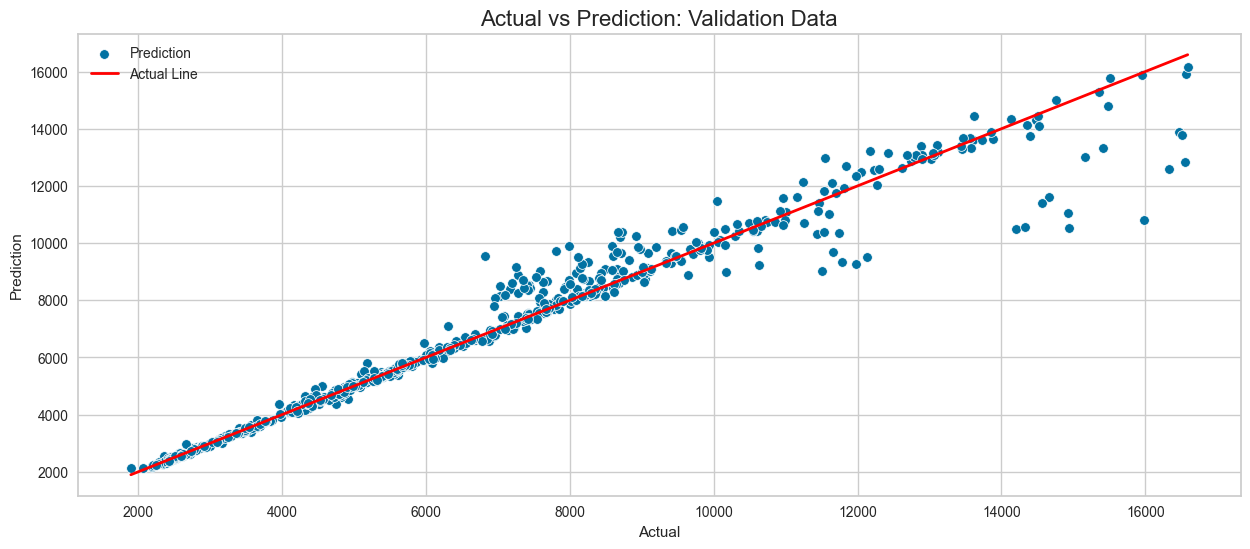

In [55]:
# Membuat scatterplot perbandingan antara prediksi dan aktual
plt.figure(figsize=(15,6))

sns.scatterplot(data=seen, y='prediction_label', x='Customer Lifetime Value', label='Prediction')
sns.regplot(data=seen, x='Customer Lifetime Value', y='Customer Lifetime Value', scatter=False, line_kws = {'linewidth': 2}, color='red', label='Actual Line')

plt.title('Actual vs Prediction: Validation Data', fontsize=16)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()

Strong Positive Correlation:

The data points following the red line show a strong positive correlation between actual and predicted values.
Indication that the model has good predictive ability.
Prediction Accuracy at Low Price Range:

The red line, as an actual value, highlights the accuracy of the model's predictions at lower property prices.
Valuable information for evaluating model performance in a given price range.
High Spread of Predictions and Actual Values:

The distribution of fairly accurate predictions at the start shows that the model is able to predict accurately to get information about low CLV values, which is the aim of making this model to achieve the goals that were set at the beginning.

Points far from the red line, especially at high predictions, indicate outliers or cases where the model may be less effective and become a limitation of the model in determining a high clv.

With the capabilities of the model that has Accuracy in low CLV values ​​certainly has significant potential in its development so that it can predict high CLV values ​​so that it can help companies to improve the company's marketing and increase profits.

In [56]:
# prediksi data test
unseen_data = predict_model(clv_model, data=unseen)
unseen_data.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1506.3285,19765087.2371,4445.7943,0.5537,0.2409,0.0858


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,prediction_label
3528,Four-Door Car,Premium,Offer1,Employed,Married,College,2.0,104.0,240.176529,88184.0,12174.589844,12774.053722
5359,Four-Door Car,Extended,Offer2,Employed,Married,Bachelor,1.0,80.0,255.999710,50989.0,3184.355225,3182.807938
1858,Four-Door Car,Extended,Offer1,Employed,Married,High School or Below,1.0,77.0,369.600006,23277.0,2993.117676,2983.938938
2523,Four-Door Car,Premium,Offer2,Employed,Married,College,1.0,103.0,480.073547,65085.0,4111.888184,4134.271804
4412,SUV,Extended,Offer2,Unemployed,Single,Bachelor,8.0,124.0,595.200012,0.0,8401.789062,8676.114386


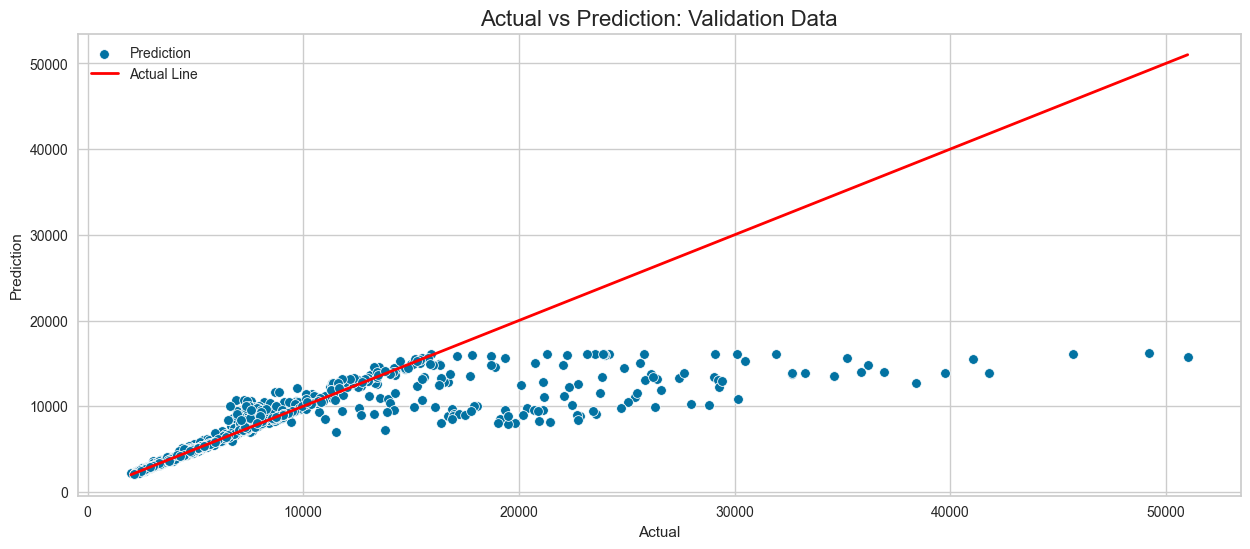

In [57]:
# Membuat scatterplot perbandingan antara prediksi dan aktual
plt.figure(figsize=(15,6))

sns.scatterplot(data=unseen_data, y='prediction_label', x='Customer Lifetime Value', label='Prediction')
sns.regplot(data=unseen_data, x='Customer Lifetime Value', y='Customer Lifetime Value', scatter=False, line_kws = {'linewidth': 2}, color='red', label='Actual Line')

plt.title('Actual vs Prediction: Validation Data', fontsize=16)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()

The model testing graph on unseen data visualizes the model performance which shows that the model has quite good accuracy in predicting low clv values.

Dots that are on the red line indicate accurate predictions, and the opposite applies to dots that are far from the red line. This distribution describes the variability of model prediction results

The concentration of dots around the red line shows the model predictions that correlate between the predictions and the actual

Advanced Analysis


- Impact On the Business :
    - The model is capable of providing optimal decisions, especially when dealing with insurance members in the future with low CLV values.
    
    - The model's ability to focus on predicting low CLV values can assist the company in identifying and addressing potential insurance members with a tendency towards low CLV.
    
    - The use of the model allows the company to allocate time more efficiently in evaluating the CLV values of existing and prospective members, avoiding less favorable offers for insurance extensions to members with low CLV.

- Drawbacks and Limitations
    - It is essential to remember that model predictions cannot achieve 100% accuracy, and prediction errors may still occur.
    
    - The model requires periodic maintenance due to changes in the behavior of insurance members and the evolving needs of the company.
    
    - Maintenance costs, including algorithm updates, need to be considered as part of the model's usage. 

- rekomendasi pengambilan keputusan
    - The company is advised to consider adding additional features to optimize the model for predicting higher CLV values.

    - Regular reviews of the model are necessary to maintain prediction quality, especially for low CLV values, to keep it optimal.

- saran strategi
    - Optimal utilization of the model can assist the company in reducing members with low CLV, particularly those with low income and high potential for claims.

    - Reducing members with low CLV is expected to enhance the company's profits by avoiding significant budgets for claims from these members.

## Batasan dan pertimbangan


In [123]:
def medvClass(x):
    if 0 <= x < 5000 :
        return '0 - 5000'
    elif 5001 <= x < 10000 :
        return '5000 - 10000'
    elif 10001 <= x < 15000 :
        return '10000 - 15000'
    elif 15001 <= x <= 20000 :
        return '15000 - 20000'
 
range_medv = [
    '0 - 5000', '5000 - 10000', '10000 - 15000', '15000 - 20000'
]

In [124]:
Limitation  = predict_model(clv_model)
Limitation['PriceClass'] = Limitation['prediction_label'].apply(medvClass)
Limitation.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,257.5653,398767.5166,631.4804,0.9621,0.0602,0.0304


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,prediction_label,PriceClass
4420,Four-Door Car,Basic,Offer4,Employed,Married,College,5.0,63.0,302.399994,29256.0,4918.916504,4943.969091,0 - 5000
400,Four-Door Car,Basic,Offer3,Unemployed,Married,Bachelor,2.0,61.0,439.200012,0.0,11510.360352,9011.751779,5000 - 10000
2841,Luxury Car,Basic,Offer2,Unemployed,Single,High School or Below,9.0,197.0,1418.400024,0.0,13883.329102,13627.667508,10000 - 15000
4426,Four-Door Car,Extended,Offer1,Unemployed,Married,High School or Below,2.0,80.0,384.000000,0.0,9087.586914,9657.342620,5000 - 10000
3278,Sports Car,Basic,Offer1,Unemployed,Single,High School or Below,4.0,106.0,508.799988,0.0,7413.386719,7558.692594,5000 - 10000


In [125]:
Limitation['PriceClass'].value_counts()

5000 - 10000     347
0 - 5000         295
10000 - 15000     96
15000 - 20000      6
Name: PriceClass, dtype: int64

In [126]:
from sklearn.metrics import mean_absolute_percentage_error

score = []
for i in range_medv:
    print(i)
    table = Limitation[Limitation['PriceClass'] == i]
    mape = mean_absolute_percentage_error(y_pred=table['prediction_label'], y_true=table['Customer Lifetime Value'])
    score.append(mape*100)

result = pd.DataFrame({
    'Range medv': range_medv,
    'MAPE (%)': score
})
result

0 - 5000
5000 - 10000
10000 - 15000
15000 - 20000


,Range medv,MAPE (%)
0,0 - 5000,1.493436
1,5000 - 10000,3.474665
2,10000 - 15000,6.335872
3,15000 - 20000,1.826896


- **Interpretation MAPE**

- Boundary Conditions 
    - Lower Value Range (0 - 5,000): High accuracy (MAPE: 1.493436%). This suggests the model is highly effective at predicting policyholders with low CLV values, which are critical for the company to identify and manage efficiently. 
    - Mid-Value Range (5,000 - 15,000): Decreasing accuracy (MAPE: 3.474665% to 6.335872%). Although the model is less accurate in this range, this aligns with the expectation that it should prioritize lower CLV predictions. 
    - Upper Value Range (>15,000): Increased accuracy (MAPE: 1.826896%), despite being a higher range, the model performs well, potentially due to less variability or fewer data points. This anomaly in the expected trend could be because of the limited data in this range, reinforcing the model's utility in low CLV predictions.
- Considerations 
    - The model's accuracy trends support the strategic focus on low CLV policyholders, beneficial for tailored interventions.
    - Inconsistencies in prediction accuracy across ranges necessitate a nuanced approach in model application, avoiding overreliance on predictions without considering potential errors.
    - The model's predictive performance may improve with additional data, especially in the upper ranges where data scarcity may affect reliability.
    - Regular model evaluation and updates are crucial to adapt to changing patterns in policyholder behavior and company strategy.



## Conclusions and recommendations
- conclusion 
    - The Tuning Random Forest model shows good ability in understanding and predicting low CLV values ​​in insurance policy holders. 
    - The model's capabilities have the potential to support company objectives in handling insurance policy holders who have low CLV values. 
    - The selected model, with a focus on the prediction accuracy of low CLV values, can be an effective tool for improving customer management strategies.
    - Increased accuracy (MAPE: 1.826896%), despite being a higher range, the model performs well, potentially due to less variability or fewer data points. This anomaly in the expected trend could be because of the limited data in this range, reinforcing the model's utility in low CLV predictions.
- recommendations 
    - Adding New Features: 
        - It is necessary to consider adding new features to the model to improve its ability to predict high CLV values. 
        - Additional features can help companies target marketing strategies to potential insurance policy holders who have low potential for making claims, supporting the growth of a more profitable insurance portfolio. 
    - Marketing Strategy Optimization: 
        - Companies can optimize marketing strategies using results model predictions to adjust the approach to customer segments with low CLV values. - Tailored marketing strategies can help reduce the risk of claims for insurance policy holders with low CLV values, thereby increasing company profitability. 
    - Periodic Analysis and Model Improvement: 
        - It is necessary to carry out periodic analysis of model performance and adjustments if necessary. 
        - Model improvements through algorithm updates or adding new data can ensure that the model remains effective and relevant over time.

## Deployment

In [127]:
save_model(clv_model, 'CLV_Prediction')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('custom_step',
                  TransformerWrapper(transformer=Pipeline(steps=[('remove_outliers',
                                                                  OutlierRemover()),
                                                                 ('preprocessor',
                                                                  ColumnTransformer(remainder='passthrough',
                                                                                    transformers=[('onehot',
                                                                                                   OneHotEncoder(drop='first'),
                                                                                                   ['Vehicle '
                                                                                                    'Class',
                                                                                                    'Employme

In [128]:
load_model('CLV_Prediction')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\LENOVO~1\AppData\Local\Temp\joblib),
         steps=[('custom_step',
                 TransformerWrapper(transformer=Pipeline(steps=[('remove_outliers',
                                                                 OutlierRemover()),
                                                                ('preprocessor',
                                                                 ColumnTransformer(remainder='passthrough',
                                                                                   transformers=[('onehot',
                                                                                                  OneHotEncoder(drop='first'),
                                                                                                  ['Vehicle '
                                                                                                   'Class',
                                                                                                   'EmploymentStatus',
                                                                                                   'Renew '
                                                                                                   'Offer '
                                                                                                   'T...
                                                                                                   'Education']),
                                                                                                 ('scaler',
                                                                                                  RobustScaler(),
                                                                                                  ['Number '
                                                                                                   'of '
                                                                                                   'Policies',
                                                                                                   'Monthly '
                                                                                                   'Premium '
                                                                                                   'Auto',
                                                                                                   'Total '
                                                                                                   'Claim '
                                                                                                   'Amount',
                                                                                                   'Income'])]))]))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 RandomForestRegressor(max_features='auto', min_samples_leaf=4,
                                       min_samples_split=5, n_estimators=150,
                                       n_jobs=-1, random_state=123))])